# Assignment # 5: Dimensionality Reduction (DR) and Features Selection (FS) Comparison

## Machine Learning II

### Wali Ullah (09745)

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb
import math
import warnings
import matplotlib.pyplot as plt        
get_ipython().run_line_magic('matplotlib', 'inline')
import cufflinks as cf

import seaborn as sns
from sklearn import preprocessing
#from sklearn.tree import export_graphviz
#import pydot
from IPython.display import Image
#import feature selection modules
from sklearn.feature_selection import mutual_info_classif,RFE,RFECV
from sklearn.feature_selection import mutual_info_regression

#import classification modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
#import regression modules
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor


#import split methods
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit

#import performance scores
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

from math import sqrt
import seaborn as sns

#Stats Libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm


# import scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler



warnings.filterwarnings("ignore")
sb.set(color_codes=True, font_scale=1.2)
try:
    from xgboost import XGBClassifier
except:
    print("Failed to import xgboost, make sure you have xgboost installed")
    print("Use following command to install it: pip install xgboost")
    XGBClassifier = None

try:
    import lightgbm as lgb
except:
    print("Failed to import lightgbm, make sure that you have lightgbm installed")
    print("Use following command to install it: conda install -c conda-forge lightgbm")
    lgb = None
    

# Part-1: Functions for Features Extraction/Selection for Classification Based Problems

## Clssification Algorithms

In [2]:
#2) include all classification and regression algorithms
# Classification Algorithms
def XgBoost(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = XGBClassifier(random_state=1,learning_rate=0.01)
    clf.fit(trainX,trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def RandomForest(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = RandomForestClassifier()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def SVM(trainX, testX, trainY, testY, svmtype="SVC", verbose=True, clf=None):
    # for one vs all
    if not clf:
        if svmtype == "Linear":
            clf = svm.LinearSVC()
        else:
            clf = svm.SVC()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)

def LogReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = LogisticRegression()
    clf.fit(trainX , trainY)
    return validationmetrics(clf,testX,testY,verbose=verbose)


#################################################################################################

# Helper function to provide list of supported algorithms for Classification
def get_supported_algorithms_clf():
    covered_algorithms = [XgBoost,RandomForest,SVM, LogReg]
    return covered_algorithms
    

######################################################################################################################################

#Classification Alg Calls
####################################

#Include function for executing ML (classification) without FS. 

 
def run_algorithms_clf(df, label_col, algo_list=get_supported_algorithms_clf(), feature_list=[]):
    """
    Run Algorithms without FS, REG and CV
    
    """
    # Lets make a copy of dataframe and work on that to be on safe side 
    _df = df.copy()
    
    if feature_list:
        impftrs = feature_list
        impftrs.append(label_col)
        _df = _df[impftrs]
    
    _df, trainX, testX, trainY, testY = traintestsplit(_df, 0.3, 91, label_col=label_col)
    algo_model_map = {}
    for algo in algo_list:
        print("============ " + algo.__name__ + " ===========")
        res = algo(trainX, testX, trainY, testY)
        algo_model_map[algo.__name__] = res.get("model_obj", None)
        print ("============================== \n")
    
    return algo_model_map

##########################################################################
# Validation metrics for classification

###############################


# Validation metrics for classification
def validationmetrics(model, testX, testY, verbose=True):   
    predictions = model.predict(testX)
    
    if model.__class__.__module__.startswith('lightgbm'):
        for i in range(0, predictions.shape[0]):
            predictions[i]= 1 if predictions[i] >= 0.5 else 0
    
    #Accuracy
    accuracy = accuracy_score(testY, predictions)*100
    
    #Precision
    precision = precision_score(testY, predictions, pos_label=1, labels=[0,1])*100
    
    #Recall
    recall = recall_score(testY, predictions,pos_label=1,labels=[0,1])*100
    
    #get FPR (specificity) and TPR (sensitivity)
    fpr , tpr, _ = roc_curve(testY, predictions)
    
    #AUC
    auc_val = auc(fpr, tpr)
    
    #F-Score
    f_score = f1_score(testY, predictions)
    
   
    if verbose:
        print("Prediction Vector: \n", predictions)
        print("\n Accuracy: \n", accuracy)
        print("\n Precision of event Happening: \n", precision)
        print("\n Recall of event Happening: \n", recall)
        print("\n AUC: \n",auc_val)
        print("\n F-Score:\n", f_score)
        #confusion Matrix
        print("\n Confusion Matrix: \n", confusion_matrix(testY, predictions,labels=[0,1]))
        #ROC plot
        
    res_map = {
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "auc_val": auc_val,
                "f_score": f_score,
                "model_obj": model
                
              }
    return res_map

In [3]:
########################################################################
#Helping Function
#######################

#Train Test Split: splitting manually
def traintestsplit(df,split,random=None, label_col=''):
    #make a copy of the label column and store in y
    y = df[label_col].copy()
    
    #now delete the original
    X = df.drop(label_col,axis=1)
    
    #manual split
    trainX, testX, trainY, testY= train_test_split(X, y, test_size=split, random_state=random)
    return X, trainX, testX, trainY, testY

#helper function which only splits into X and y
def XYsplit(df, label_col):
    y = df[label_col].copy()
    X = df.drop(label_col,axis=1)
    return X,y

#Helper Function for Tranformation

#MinMax Transformation
def MinMax_Transformation(df, label_col):
    y = df[label_col].copy()
    X = df.drop(label_col,axis=1)
    scaler = MinMaxScaler()
    scaled_features = MinMaxScaler().fit_transform(X.values)
    df1= pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
    z1=pd.DataFrame(df1)
    z2=pd.DataFrame(y)
    df= pd.concat([z1,z2], axis=1)
    return df 
#Standard Transformation
def Standard_Transformation(df, label_col):
    y = df[label_col].copy()
    X = df.drop(label_col,axis=1)
    scaled_features = StandardScaler().fit_transform(X.values)
    df1= pd.DataFrame(scaled_features, index=X.index, columns=X.columns)
    z1=pd.DataFrame(df1)
    z2=pd.DataFrame(y)
    df= pd.concat([z1,z2], axis=1)
    return df 

## Filling Missing Values


def fill_na_interpolate(df, cols_to_interpolate):
    for i in cols_to_interpolate:
        df[i] = df[i].interpolate(method ='linear', limit_direction ='forward')
    return df

def drop_na_rows(df, cols_to_drop_na_rows):
        for i in cols_to_drop_na_rows:
            df = df.drop(df[df[i].isnull()].index)
        return df

In [4]:
# Load Data
def load_data(file_name):
    def readcsv(file_name):
        return pd.read_csv(file_name)
    def readexcel(file_name):
        return pd.read_excel(file_name)
    
    func_map = {
        "csv": readcsv,
        "xls": readexcel,
        "xlsx": readexcel,
        
    }
    
    # default reader = readcsv
    reader = func_map.get("csv")
    
    for k,v in func_map.items():
        if file_name.endswith(k):
            reader = v
            break
    return reader(file_name)


## Function to call LDA, PCA, TSNE, Lasso, Random Forest, XGBoost and Recursive Feature Elemination for Features Selection for Classification Problem

In [5]:
##########################################################################################
#Function to call LDA, PCA, TSNE, Lasso, Random Forest, XGBoost and Recursive Feature Elemination for Features Selection
###########################################################
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE


######################################################################################

# for Binary Class Classification 

##################################

def FE_MLalg_binaryclf(df, label_col, X, Y, trainX, testX, trainY, testY, lda_components,
           pca_components, tnse_components, number_iter, alpha, num_features, learning_rate,tree,random=None):
    
    df1=df.drop(label_col,axis=1)
    ##LDA##
    
    lda = LinearDiscriminantAnalysis(n_components=lda_components)
    # run an LDA and use it to transform the features
    X_lda = lda.fit(X, Y).transform(X)
    LDA_df = pd.DataFrame(data = X_lda)#, columns = ['X_LDA_1'])
    LDA_df = pd.concat([LDA_df, df[label_col]], axis = 1)
    print('Linear Discriminant Analysis')
    print('Original number of features:', X.shape[1])
    print('Reduced number of features:', X_lda.shape[1])
    print('ML Classification Algorithms Results with LDA FS')
    ML_binary_clf(LDA_df,label_col)
    ##PCA##
    pca = PCA(n_components=pca_components)
    X_pca = pca.fit_transform(X)
    PCA_df = pd.DataFrame(data = X_pca)#, #columns = [b])
    PCA_df = pd.concat([PCA_df, df[label_col]], axis = 1)
    print('PCA Analysis')
    print('Original number of features:', X.shape[1])
    print('Reduced number of features:', X_pca.shape[1])
    print('ML Classification Algorithms Results with PCA FS')
    ML_binary_clf(PCA_df,label_col)
    ##tnse##
    tsne = TSNE(n_components=tnse_components, verbose=0, perplexity=40, n_iter=number_iter)
    X_tsne = tsne.fit_transform(X)
    TSNE_df = pd.DataFrame(data = X_tsne)#, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
    TSNE_df = pd.concat([TSNE_df, df[label_col]], axis = 1)
    print('tSNE Analysis')
    print('Original number of features:', X.shape[1])
    print('Reduced number of features:', X_tsne.shape[1])
    print('ML Classification Algorithms Results with tSNE FS')
    ML_binary_clf(TSNE_df,label_col)
    
    #for Lasoo
    
    sel_ = SelectFromModel(LogisticRegression(C=alpha, penalty='l1',solver='liblinear'))
    #clf = LogisticRegression(C=0.01, penalty='l1',solver='liblinear');
    sel_.fit(X, Y)
    selected_feat = list(X.columns[(sel_.get_support())])
    #pd.Series(X.columns[(sel_.get_support())])
    impftrs_l1 = selected_feat
    impftrs_ll1=pd.Series(impftrs_l1)
    impftrs_l1.append(label_col)
    LASSO_df = df[impftrs_l1]
    print('Lasso Analysis')
    print('Selected Features')
    print(impftrs_ll1)
    print('ML Classification Algorithms Results with Lasso FS')
    ML_binary_clf(LASSO_df,label_col)
    
    #for Random Forest calssification
    clf  = RandomForestClassifier(n_estimators=tree, random_state=random)
    clf.fit(trainX, trainY)
    #validationmetrics(clf,testX,testY)
    res_rf = pd.Series(clf.feature_importances_, index=df1.columns.values).sort_values(ascending=False)*100
    impftrs_rf1=res_rf.head(num_features)
    impftrs_rf=list(impftrs_rf1.keys())
    impftrs_rf.append(label_col)
    RF_df = df[impftrs_rf]
    print('Random Forest FS Analysis')
    print('Selected Features')
    print(impftrs_rf1)
    print('ML Classification Algorithms Results with Random Forest FS')
    ML_binary_clf(RF_df,label_col)
    
    #for XGBoost calssification
    clf  = XGBClassifier(random_state=1,learning_rate=learning_rate)
    clf.fit(trainX, trainY)
    res_xgb = pd.Series(clf.feature_importances_, index=df1.columns.values).sort_values(ascending=False)*100
    impftrs_xgb1=res_xgb.head(num_features)
    impftrs_xgb=list(impftrs_xgb1.keys())
    impftrs_xgb.append(label_col)
    XGB_df = df[impftrs_xgb]
    print('Random Forest FS Analysis')
    print('Selected Features')
    print(impftrs_xgb1)
    print('ML Classification Algorithms Results with Random Forest FS')
    ML_binary_clf(XGB_df,label_col)
    
    ###RFE
    cols = list(X.columns)
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=num_features)
    # fit RFE
    rfe.fit(trainX, trainY)
    temp = pd.Series(rfe.support_,index = cols)
    selected_features_rfe = temp[temp==True].index
    #print(selected_features_rfe)
    impre=pd.Series(selected_features_rfe)
    impftrs_rfe = list(selected_features_rfe)
    impftrs_rfe.append(label_col)
    print('RFE FS Analysis')
    print('Selected Features')
    print(impre)
    print('ML Classification Algorithms Results with RFE FS')
    RFE_df = df[impftrs_rfe]
    ML_binary_clf(RFE_df,label_col)
    return LDA_df, PCA_df, TSNE_df, LASSO_df, RF_df, XGB_df, RFE_df#res_rf, res_xgb
    
##############################################################################################
######################################################################################

# for Multi-Class Classification 

##################################
def FE_MLalg_multiclf(df, label_col, X, Y, trainX, testX, trainY, testY, lda_components,
           pca_components, tnse_components, number_iter, alpha, num_features, learning_rate,tree,random=None):
    
    df1=df.drop(label_col,axis=1)
    ##LDA##
    
    lda = LinearDiscriminantAnalysis(n_components=lda_components)
    # run an LDA and use it to transform the features
    X_lda = lda.fit(X, Y).transform(X)
    LDA_df = pd.DataFrame(data = X_lda)#, columns = ['X_LDA_1'])
    LDA_df = pd.concat([LDA_df, df[label_col]], axis = 1)
    print('Linear Discriminant Analysis')
    print('Original number of features:', X.shape[1])
    print('Reduced number of features:', X_lda.shape[1])
    print('ML Classification Algorithms Results with LDA FS')
    ML_multiclass_clf(LDA_df,label_col)
    ##PCA##
    pca = PCA(n_components=pca_components)
    X_pca = pca.fit_transform(X)
    PCA_df = pd.DataFrame(data = X_pca)#, #columns = [b])
    PCA_df = pd.concat([PCA_df, df[label_col]], axis = 1)
    print('PCA Analysis')
    print('Original number of features:', X.shape[1])
    print('Reduced number of features:', X_pca.shape[1])
    print('ML Classification Algorithms Results with PCA FS')
    ML_multiclass_clf(PCA_df,label_col)
    ##tnse##
    tsne = TSNE(n_components=tnse_components, verbose=0, perplexity=40, n_iter=number_iter)
    X_tsne = tsne.fit_transform(X)
    TSNE_df = pd.DataFrame(data = X_tsne)#, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
    TSNE_df = pd.concat([TSNE_df, df[label_col]], axis = 1)
    print('tSNE Analysis')
    print('Original number of features:', X.shape[1])
    print('Reduced number of features:', X_tsne.shape[1])
    print('ML Classification Algorithms Results with tSNE FS')
    ML_multiclass_clf(TSNE_df,label_col)
    #for Lasoo
    
    sel_ = SelectFromModel(LogisticRegression(C=alpha, penalty='l1',solver='liblinear'))
    #clf = LogisticRegression(C=0.01, penalty='l1',solver='liblinear');
    sel_.fit(X, Y)
    selected_feat = list(X.columns[(sel_.get_support())])
    #pd.Series(X.columns[(sel_.get_support())])
    impftrs_l1 = selected_feat
    impftrs_ll1=pd.Series(impftrs_l1)
    impftrs_l1.append(label_col)
    LASSO_df = df[impftrs_l1]
    print('Lasso Analysis')
    print('Selected Features')
    print(impftrs_ll1)
    print('ML Classification Algorithms Results with Lasso FS')
    ML_multiclass_clf(LASSO_df,label_col)
    
    
    #for Random Forest calssification
    clf  = RandomForestClassifier(n_estimators=tree, random_state=random)
    clf.fit(trainX, trainY)
    #validationmetrics(clf,testX,testY)
    res_rf = pd.Series(clf.feature_importances_, index=df1.columns.values).sort_values(ascending=False)*100
    impftrs_rf1=res_rf.head(num_features)
    impftrs_rf=list(impftrs_rf1.keys())
    impftrs_rf.append(label_col)
    RF_df = df[impftrs_rf]
    print('Random Forest FS Analysis')
    print('Selected Features')
    print(impftrs_rf1)
    print('ML Classification Algorithms Results with Random Forest FS')
    ML_multiclass_clf(RF_df,label_col)
    
    
    
    #for XGBoost calssification
    clf  = XGBClassifier(random_state=1,learning_rate=learning_rate)
    clf.fit(trainX, trainY)
    res_xgb = pd.Series(clf.feature_importances_, index=df1.columns.values).sort_values(ascending=False)*100
    impftrs_xgb1=res_xgb.head(num_features)
    impftrs_xgb=list(impftrs_xgb1.keys())
    impftrs_xgb.append(label_col)
    XGB_df = df[impftrs_xgb]
    print('Random Forest FS Analysis')
    print('Selected Features')
    print(impftrs_xgb1)
    print('ML Classification Algorithms Results with Random Forest FS')
    ML_multiclass_clf(XGB_df,label_col)
    
    ###RFE
    cols = list(X.columns)
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=num_features)
    # fit RFE
    rfe.fit(trainX, trainY)
    temp = pd.Series(rfe.support_,index = cols)
    selected_features_rfe = temp[temp==True].index
    #print(selected_features_rfe)
    impre=pd.Series(selected_features_rfe)
    impftrs_rfe = list(selected_features_rfe)
    impftrs_rfe.append(label_col)
    print('RFE FS Analysis')
    print('Selected Features')
    print(impre)
    print('ML Classification Algorithms Results with RFE FS')
    RFE_df = df[impftrs_rfe]
    ML_multiclass_clf(RFE_df,label_col)
    return LDA_df, PCA_df, TSNE_df, LASSO_df, RF_df, XGB_df, RFE_df#res_rf, res_xgb
    


In [6]:
#######################################################################################
#Classification Alg Calls
####################################


######################################################################################

# for Binary Class Classification 

##################################

#Include function for executing ML (classification) with and without FS for binary classification. 

def ML_binary_clf(df,label_col):
    Y= df[label_col].copy()
    X = df.drop(label_col,axis=1)
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
    algorithms = []
    algorithms.append(XGBClassifier(random_state=1,learning_rate=0.01, verbosity = 0,silent=True))
    algorithms.append(RandomForestClassifier())
    algorithms.append(svm.SVC())
    algorithms.append(LogisticRegression())
    data1 = []
    
    for algo in algorithms:
        algo.fit(trainX,trainY)
        Y_pred = algo.predict(testX) 
        accuracy = accuracy_score(testY, Y_pred)*100
        precision = precision_score(testY, Y_pred, pos_label=1, labels=[0,1])*100
        #Recall
        recall = recall_score(testY, Y_pred,pos_label=1,labels=[0,1])*100
        #get FPR (specificity) and TPR (sensitivity)
        fpr , tpr, _ = roc_curve(testY, Y_pred)
        #AUC
        auc_val = auc(fpr, tpr)
        #F-Score
        f_score = f1_score(testY, Y_pred)
        
        data1.append(({
            'accuracy':accuracy,
            'precision': precision,'recall': recall,
            'auc_val':auc_val,
            'f_score': f_score, 
            }))

    results = pd.DataFrame(data=data1, columns=['accuracy',
                                                'precision','recall','auc_val','f_score'],
                       index=['XGBoost', 'Random_Forest','SVM', 'LogisticRegression'])
    display(results)
    #print(results)
    return results
        
######################################################################################

# for Multiclass Classification 

##################################

#Include function for executing ML (classification) with and without FS for Multiclass Classification 

def ML_multiclass_clf(df,label_col):
    Y= df[label_col].copy()
    X = df.drop(label_col,axis=1)
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
    algorithms = []
    algorithms.append(XGBClassifier(random_state=1,learning_rate=0.01, verbosity = 0,silent=True))
    algorithms.append(RandomForestClassifier())
    algorithms.append(svm.SVC())
    algorithms.append(LogisticRegression())
    data1 = []
    
    for algo in algorithms:
        algo.fit(trainX,trainY)
        Y_pred = algo.predict(testX) 
        accuracy = accuracy_score(testY, Y_pred)*100
        precision = precision_score(testY, Y_pred, average='micro')*100
        #Recall
        recall = recall_score(testY, Y_pred, average='micro')*100
        #get FPR (specificity) and TPR (sensitivity)
        #fpr , tpr, _ = roc_curve(testY, Y_pred,sample_weight)
        #AUC
        #auc_val = auc(fpr, tpr)
        #F-Score
        f_score = f1_score(testY, Y_pred,average="macro")
        
        data1.append(({
            'accuracy':accuracy,
            'precision': precision,'recall': recall,
            #'auc_val':auc_val,
            'f_score': f_score, 
            }))

    results = pd.DataFrame(data=data1, columns=['accuracy',
                                                'precision','recall',#'auc_val',
                                                'f_score'],
                       index=['XGBoost', 'Random_Forest','SVM', 'LogisticRegression'])
    display(results)
    #print(results)
    return results
        

# Part-2: Functions for Features Extraction/Selection for Regression Based Problems

## Regression Algorithms

In [7]:
#Regression Problem Setup

#################################################################################################
# Regression Algorithms
def LinearReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = LinearRegression()
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)



def VotingReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    lr = LinearRegression()
    rf = RandomForestRegressor(n_estimators=100)
    sv = SVR(kernel="rbf")
    dt = DecisionTreeRegressor()
    gb = GradientBoostingRegressor()
    ab = AdaBoostRegressor(random_state=0, n_estimators=100)
    if not clf:
        clf = VotingRegressor([('rf', rf), ('dt', dt), ('gb', gb), ('ab', ab)])
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)


#################################################################################################


# Helper function to provide list of supported algorithms for Regression
def get_supported_algorithms_reg():
    covered_algorithms = [LinearReg, VotingReg]
    return covered_algorithms

#ElasticNet, PolynomialReg,
#################################################################################################
#Regression Call
####################################

# Helper function to run all algorithms provided in algo_list over given dataframe, without cross validation and Features Selection
# By default it will run all supported algorithms 
def run_algorithms_reg(df, label_col, algo_list=get_supported_algorithms_reg(), feature_list=[]):
    """
    Run Algorithms without FS, REG and CV
    
    """
    # Lets make a copy of dataframe and work on that to be on safe side 
    _df = df.copy()
    
    if feature_list:
        impftrs = feature_list
        impftrs.append(label_col)
        _df = _df[impftrs]
    
    _df, trainX, testX, trainY, testY = traintestsplit(_df, 0.2, 91, label_col=label_col)
    algo_model_map = {}
    for algo in algo_list:
        print("============ " + algo.__name__ + " ===========")
        res = algo(trainX, testX, trainY, testY)
        algo_model_map[algo.__name__] = res.get("model_obj", None)
        print ("============================== \n")
    
    return algo_model_map

##############################################################################################################################
#Validation metrics for Regression algorithms
######################################################
#Validation metrics for Regression algorithms
def validationmetrics_reg(model,testX,testY, verbose=True):
    predictions = model.predict(testX)
    
    # R-squared
    r2 = r2_score(testY,predictions, multioutput='variance_weighted')
    
    # Adjusted R-squared
    r2_adjusted = 1-(1-r2)*(testX.shape[0]-1)/(testX.shape[0]-testX.shape[1]-1)
    #MAE
    mae = mean_absolute_error(testY,predictions)
    # MSE
    mse = mean_squared_error(testY,predictions)
    
    #RMSE
    rmse = math.sqrt(mse)
    
    if verbose:
        print("R-Squared Value: ", r2)
        print("Adjusted R-Squared: ", r2_adjusted)
        print("MAE: ", mae)
        print("RMSE: ", rmse)
    res_map = {
                "r2": r2,
                "r2_adjusted": r2_adjusted,
                "mae": mae,
                "rmse": rmse,
                "model_obj": model
              }
    return res_map



## Function to call PCA, TSNE, Random Forest, XGBoost and Recursive Feature Elemination for Features Selection for Regression Problem

In [8]:
##########################################################################################
#Function to call LDA, PCA, TSNE, Lasso, Random Forest, XGBoost and Recursive Feature Elemination for Features Selection
###########################################################
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor
#from sklearn.xgboost import XGBRegressor

def FE_MLalg_reg(df, label_col, X, Y, trainX, testX, trainY, testY, lda_components,
           pca_components, tnse_components, number_iter, alpha, num_features, learning_rate,tree,random=None):
    
    df1=df.drop(label_col,axis=1)
    
    ##PCA##
    pca = PCA(n_components=pca_components)
    X_pca = pca.fit_transform(X)
    PCA_df = pd.DataFrame(data = X_pca)#, #columns = [b])
    PCA_df = pd.concat([PCA_df, df[label_col]], axis = 1)
    print('PCA Analysis')
    print('Original number of features:', X.shape[1])
    print('Reduced number of features:', X_pca.shape[1])
    print('ML Regression Algorithms Results with PCA FS')
    ML_reg(PCA_df,label_col)
    ##tnse##
    tsne = TSNE(n_components=tnse_components, verbose=0, perplexity=40, n_iter=number_iter)
    X_tsne = tsne.fit_transform(X)
    TSNE_df = pd.DataFrame(data = X_tsne)#, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
    TSNE_df = pd.concat([TSNE_df, df[label_col]], axis = 1)
    print('tSNE Analysis')
    print('Original number of features:', X.shape[1])
    print('Reduced number of features:', X_tsne.shape[1])
    print('ML Regression Algorithms Results with tSNE FS')
    ML_reg(TSNE_df,label_col)
    
    
  #for Random Forest 
    
    
    clf  = RandomForestRegressor(n_estimators=tree, random_state=random)
    clf.fit(trainX, trainY)
    #validationmetrics(clf,testX,testY)
    res_rf = pd.Series(clf.feature_importances_, index=df1.columns.values).sort_values(ascending=False)*100
    impftrs_rf1=res_rf.head(num_features)
    impftrs_rf=list(impftrs_rf1.keys())
    impftrs_rf.append(label_col)
    RF_df = df[impftrs_rf]
    print('Random Forest FS Analysis')
    print('Selected Features')
    print(impftrs_rf1)
    print('ML Regression Algorithms Results with Random Forest FS')
    ML_reg(RF_df,label_col)
    
    
    #for XGBoost 
    clf  = XGBRegressor(random_state=1,learning_rate=learning_rate)
    clf.fit(trainX, trainY)
    #validationmetrics(clf,testX,testY)
    res_xgb = pd.Series(clf.feature_importances_, index=df1.columns.values).sort_values(ascending=False)*100
    impftrs_xgb1=res_xgb.head(num_features)
    impftrs_xgb=list(impftrs_xgb1.keys())
    impftrs_xgb.append(label_col)
    XGB_df = df[impftrs_xgb]
    print('Random Forest FS Analysis')
    print('Selected Features')
    print(impftrs_xgb1)
    print('ML Regression Algorithms Results with XGB FS')
    ML_reg(XGB_df,label_col)
    
    ###RFE
    cols = list(X.columns)
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=num_features)
    # fit RFE
    rfe.fit(trainX, trainY)
    temp = pd.Series(rfe.support_,index = cols)
    selected_features_rfe = temp[temp==True].index
    impre=pd.Series(selected_features_rfe)
    impftrs_rfe = list(selected_features_rfe)
    impftrs_rfe.append(label_col)
    print('RFE FS Analysis')
    print('Selected Features')
    print(impre)
    print('ML Regression Algorithms Results with RFE FS')
    RFE_df = df[impftrs_rfe]
    ML_reg(RFE_df,label_col)
    return PCA_df, TSNE_df, RF_df, XGB_df, RFE_df
    


In [9]:
#######################################################################################
#Regression Alg Calls
####################################

#Include function for executing ML (classification) with and without FS. 
def ML_reg(df,label_col):
    Y= df[label_col].copy()
    
    #now delete the original
    X = df.drop(label_col,axis=1)
    
    trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
    r = LinearRegression()
    rf = RandomForestRegressor(n_estimators=100)
    sv = SVR(kernel="rbf")
    dt = DecisionTreeRegressor()
    gb = GradientBoostingRegressor()
    ab = AdaBoostRegressor(random_state=0, n_estimators=100)
            
    algorithms = []
    algorithms.append(LinearRegression())
    
    algorithms.append(VotingRegressor([('rf', rf), ('dt', dt), ('gb', gb), ('ab', ab)]))
    
    data1 = []
    
    for algo in algorithms:
        algo.fit(trainX,trainY)
        
        Y_pred = algo.predict(testX) 
        r2 = r2_score(testY,Y_pred, multioutput='variance_weighted')
    
    # Adjusted R-squared
        r2_adjusted = 1-(1-r2)*(testX.shape[0]-1)/(testX.shape[0]-testX.shape[1]-1)
    #MAE
        mae = mean_absolute_error(testY,Y_pred)
    # MSE
        mse = mean_squared_error(testY,Y_pred)
    
    #RMSE
        rmse = math.sqrt(mse)
        
        data1.append(({'R-Squared':r2,'Adj-R Squared': r2_adjusted,'MAE': mae,
           'MSE':mse,'RMSE': rmse}))

    results = pd.DataFrame(data=data1, columns=['R-Squared',
                                                'Adj-R Squared','MAE','MSE','RMSE'],
                       index=['Linear_Regression', 'Voting_Regression'])
    display(results)
    #print(results)
    return results
        

# Data Analysis

## Classification based Data Analysis

Four different types of datasets are analyzed using four different types of ML algorithms, which are
1. XGBoost
2. Random Forest
3. SVM
4. Logistic Regression

with and without feature extraction/selections. Seven different types of features extraction/selections are considered, which are

1. Linear Discriminant Analysis (LDA)
2. Principal component analysis (PCA)
3. t-distributed stochastic neighbor embedding (t-SNE) 
4. Lasso based L1 feature selection - 
5. Random Forest based Feature Selection (RF)
6. XGBooset based Feature Selection 
7. Recursive Feature Elimination (RFE)

The datasets are 

1. Dataset 1: Parkinson's Disease Classification (pd_speech_feature)
2. Dataset 2: Default of Credit Card Clients
3. Dataset 3: MEU-Mobile KSD 2016
4. Dataset 4: Mice Protein Expression (Data_Cortex_Nuclear)  

The first two are the binary class, while the latter two are the multi-class classification datasets.


## Dataset 1: Parkinson's Disease Classification (pd_speech_feature)

In [11]:
FILE_NAME = "pd_speech_features.csv"
LABEL_COL = "class"
df = load_data(FILE_NAME)
display(df.head())
print(df.shape)
print(df.dtypes)

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


(756, 755)
id                             int64
gender                         int64
PPE                          float64
DFA                          float64
RPDE                         float64
                              ...   
tqwt_kurtosisValue_dec_33    float64
tqwt_kurtosisValue_dec_34    float64
tqwt_kurtosisValue_dec_35    float64
tqwt_kurtosisValue_dec_36    float64
class                          int64
Length: 755, dtype: object


In [12]:
#Data X Transformation
#df['id'] = df['id'].astype(int)
label_col='class' 
df1=df
df=MinMax_Transformation(df1, label_col)

### ML Alg witout FE

In [13]:
# ML Alg witout FE

label_col='class'
df_cpy=df 
res=ML_binary_clf(df_cpy,label_col)




,accuracy,precision,recall,auc_val,f_score
XGBoost,85.022026,85.483871,95.783133,0.757604,0.903409
Random_Forest,87.224670,86.631016,97.590361,0.783034,0.917847
SVM,82.378855,80.882353,99.397590,0.677316,0.891892
LogisticRegression,86.343612,85.714286,97.590361,0.766640,0.912676


The results of application of four different ML algorithms on binary classification-based problems show that the Logistic Regression outperform the rest of algorithms in terms of overall accuracy. However, the Random Forest and SVM outperform the others in terms of precision and recall. Overall SVM seems to the best candidate model to predict the class label using the Parkinson's Disease Classification (pd_speech_feature) data set.

### ML Alg with Features Selection (10 Features)

In [19]:
## ML Alg with Features Selection (10 Features)
# with Features Selection
label_col='class' 
Y= df[label_col].copy()
    
    #now delete the original
X = df.drop(label_col,axis=1)
X, y=XYsplit(df, label_col)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
df_cpy=df    
label_col='class' 
lda_components=1
pca_components=10
tnse_components=3
number_iter=300
alpha=0.09
num_features=10
learning_rate=0.2
tree=500
    
    

LDA_df, PCA_df, TSNE_df, LASSO_df, RF_df, XGB_df, RFE_df=FE_MLalg_binaryclf(df_cpy, label_col, X, Y, trainX, testX, trainY, 
                                                                      testY, lda_components, pca_components, 
                                                                      tnse_components, number_iter, alpha, num_features, 
                                                                      learning_rate,tree,random=None)



Linear Discriminant Analysis
Original number of features: 754
Reduced number of features: 1
ML Classification Algorithms Results with LDA FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,100.0,100.0,100.0,1.0,1.0
Random_Forest,100.0,100.0,100.0,1.0,1.0
SVM,100.0,100.0,100.0,1.0,1.0
LogisticRegression,100.0,100.0,100.0,1.0,1.0


PCA Analysis
Original number of features: 754
Reduced number of features: 10
ML Classification Algorithms Results with PCA FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,83.259912,83.684211,95.783133,0.724817,0.893258
Random_Forest,85.022026,84.020619,98.192771,0.736865,0.905556
SVM,84.140969,83.505155,97.590361,0.725657,0.900000
LogisticRegression,82.819383,82.564103,96.987952,0.706251,0.891967


tSNE Analysis
Original number of features: 754
Reduced number of features: 3
ML Classification Algorithms Results with tSNE FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,82.819383,84.699454,93.373494,0.737359,0.888252
Random_Forest,84.140969,86.111111,93.373494,0.761949,0.895954
SVM,81.057269,80.000000,98.795181,0.657910,0.884097
LogisticRegression,71.365639,72.645740,97.590361,0.487952,0.832905


Lasso Analysis
Selected Features
0                          gender
1                             DFA
2              mean_MFCC_2nd_coef
3             std_6th_delta_delta
4             std_8th_delta_delta
5             std_9th_delta_delta
6     tqwt_entropy_shannon_dec_16
7         tqwt_entropy_log_dec_12
8         tqwt_entropy_log_dec_26
9         tqwt_entropy_log_dec_34
10        tqwt_entropy_log_dec_35
11           tqwt_maxValue_dec_11
12      tqwt_kurtosisValue_dec_36
dtype: object
ML Classification Algorithms Results with Lasso FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,81.057269,85.549133,89.156627,0.740865,0.873156
Random_Forest,85.462555,85.945946,95.783133,0.765801,0.905983
SVM,86.343612,85.340314,98.192771,0.761456,0.913165
LogisticRegression,82.819383,82.564103,96.987952,0.706251,0.891967


Random Forest FS Analysis
Selected Features
std_delta_delta_log_energy    1.554695
std_delta_log_energy          1.266033
std_6th_delta_delta           0.918244
std_7th_delta_delta           0.904587
std_9th_delta_delta           0.901225
tqwt_TKEO_mean_dec_12         0.881834
tqwt_TKEO_std_dec_12          0.821213
mean_MFCC_2nd_coef            0.779943
std_Log_energy                0.719549
std_6th_delta                 0.657631
dtype: float64
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,82.378855,83.510638,94.578313,0.718793,0.887006
Random_Forest,81.497797,84.065934,92.168675,0.723138,0.879310
SVM,79.295154,79.310345,96.987952,0.640677,0.872629
LogisticRegression,77.092511,78.217822,95.180723,0.615248,0.858696


Random Forest FS Analysis
Selected Features
tqwt_TKEO_std_dec_13           6.956244
std_delta_delta_log_energy     2.836820
tqwt_entropy_log_dec_18        2.747715
tqwt_entropy_log_dec_12        2.729622
tqwt_entropy_shannon_dec_13    2.071369
app_LT_TKEO_mean_3_coef        2.023748
tqwt_entropy_shannon_dec_33    1.961154
tqwt_TKEO_std_dec_11           1.951341
tqwt_minValue_dec_9            1.867691
minIntensity                   1.691795
dtype: float32
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,79.295154,84.795322,87.349398,0.723632,0.860534
Random_Forest,85.903084,86.413043,95.783133,0.773998,0.908571
SVM,78.854626,77.830189,99.397590,0.611742,0.873016
LogisticRegression,78.414097,78.260870,97.590361,0.619099,0.868633


RFE FS Analysis
Selected Features
0                mean_2nd_delta
1    std_delta_delta_log_energy
2           std_6th_delta_delta
3           std_7th_delta_delta
4           std_9th_delta_delta
5       tqwt_entropy_log_dec_26
6       tqwt_entropy_log_dec_33
7          tqwt_maxValue_dec_11
8          tqwt_maxValue_dec_25
9     tqwt_kurtosisValue_dec_36
dtype: object
ML Classification Algorithms Results with RFE FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,83.700441,87.283237,90.963855,0.774491,0.890855
Random_Forest,83.700441,86.033520,92.771084,0.758937,0.892754
SVM,84.140969,84.946237,95.180723,0.746395,0.897727
LogisticRegression,83.259912,84.042553,95.180723,0.730002,0.892655



Here seven different techniques are used to perform dimensionality reduction on high-dimensional data. Many different feature selection and feature extraction methods have been used. All these methods aim to remove redundant and irrelevant features so that classification of new instances will be more accurate. 
The methods are 

1. Linear Discriminant Analysis (LDA)
2. Principal component analysis (PCA)
3. t-distributed stochastic neighbor embedding (t-SNE) 
4. Lasso based L1 feature selection - 
5. Random Forest based Feature Selection (RF)
6. XGBooset based Feature Selection 
7. Recursive Feature Elimination (RFE)

The selected features are used as features to predict the class label using four different Machine Learning algorithms, which are

1. XGBoost, 
2. Random forest
3. SVM 
4. Logistic Regression (LR)

The results show that with the application of reducing the features the performance falls a bit in comparison to the using original whole features set. However, there does not seem a significant reduction in the performance in terms of accuracy, precision, and recall. The fall in performance is less than 1% if we extract about 10 of the features and use them in the analysis.

The comparison across various features extraction and selection methods indicates that LDA outperform the rest of six features extractions/selection methods as it has the highest accuracy, precision, and recall. PCA is on the second number in terms of performance. It shows that the features variation is almost captured by the single LDA factor and about 10 PCA based factors. More than 95% of the variation is captured by these factors. Lasso, Random Forest, RFE and XGBoost based methods have almost performance as the result of four ML based algorithms is almost similar across these three features selection-based methods.

The t-SNE based feature selection methods seems the worst among the seven methods. However, the accuracy is about 78% along with the reasonable precision and accuracy.
Comparison across Machine Learning algorithms show that the Random Forest and SVM are the best and come up with almost same amount of accuracy and precision.


### ML Alg with Features Selection (15 Features)

In [20]:
## ML Alg with Features Selection (15 Features)
# with Features Selection
label_col='class' 
Y= df[label_col].copy()
    
    #now delete the original
X = df.drop(label_col,axis=1)
X, y=XYsplit(df, label_col)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
df_cpy=df    
label_col='class' 
lda_components=1
pca_components=15
tnse_components=3
number_iter=300
alpha=0.12
num_features=15
learning_rate=0.2
tree=500
    
    

LDA_df, PCA_df, TSNE_df, LASSO_df, RF_df, XGB_df, RFE_df=FE_MLalg_binaryclf(df_cpy, label_col, X, Y, trainX, testX, trainY, 
                                                                      testY, lda_components, pca_components, 
                                                                      tnse_components, number_iter, alpha, num_features, 
                                                                      learning_rate,tree,random=None)



Linear Discriminant Analysis
Original number of features: 754
Reduced number of features: 1
ML Classification Algorithms Results with LDA FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,100.0,100.0,100.0,1.0,1.0
Random_Forest,100.0,100.0,100.0,1.0,1.0
SVM,100.0,100.0,100.0,1.0,1.0
LogisticRegression,100.0,100.0,100.0,1.0,1.0


PCA Analysis
Original number of features: 754
Reduced number of features: 15
ML Classification Algorithms Results with PCA FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,83.259912,83.684211,95.783133,0.724817,0.893258
Random_Forest,84.581498,83.937824,97.590361,0.733853,0.902507
SVM,85.022026,84.020619,98.192771,0.736865,0.905556
LogisticRegression,82.819383,82.564103,96.987952,0.706251,0.891967


tSNE Analysis
Original number of features: 754
Reduced number of features: 3
ML Classification Algorithms Results with tSNE FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,83.259912,84.408602,94.578313,0.735187,0.892045
Random_Forest,85.462555,85.185185,96.987952,0.755432,0.907042
SVM,77.092511,76.388889,99.397590,0.578955,0.863874
LogisticRegression,72.246696,72.888889,98.795181,0.493976,0.838875


Lasso Analysis
Selected Features
0                          gender
1                             DFA
2              mean_MFCC_2nd_coef
3             std_6th_delta_delta
4             std_8th_delta_delta
5             std_9th_delta_delta
6     tqwt_entropy_shannon_dec_16
7     tqwt_entropy_shannon_dec_17
8         tqwt_entropy_log_dec_12
9         tqwt_entropy_log_dec_26
10        tqwt_entropy_log_dec_34
11        tqwt_entropy_log_dec_35
12           tqwt_maxValue_dec_11
13      tqwt_kurtosisValue_dec_28
14      tqwt_kurtosisValue_dec_36
dtype: object
ML Classification Algorithms Results with Lasso FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,81.497797,84.444444,91.566265,0.728323,0.878613
Random_Forest,84.581498,85.026738,95.783133,0.749407,0.900850
SVM,82.819383,82.233503,97.590361,0.701067,0.892562
LogisticRegression,84.140969,83.163265,98.192771,0.720472,0.900552


Random Forest FS Analysis
Selected Features
std_delta_delta_log_energy     1.627607
std_delta_log_energy           1.599640
std_6th_delta_delta            0.934900
std_7th_delta                  0.861546
std_9th_delta_delta            0.794993
tqwt_entropy_shannon_dec_12    0.775695
mean_MFCC_2nd_coef             0.727541
tqwt_TKEO_mean_dec_12          0.721502
tqwt_TKEO_std_dec_12           0.691918
std_7th_delta_delta            0.657989
std_Log_energy                 0.633259
std_10th_delta_delta           0.630228
tqwt_entropy_log_dec_12        0.620777
std_8th_delta_delta            0.576910
tqwt_TKEO_std_dec_11           0.559679
dtype: float64
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,83.700441,85.635359,93.373494,0.753753,0.893372
Random_Forest,83.259912,84.042553,95.180723,0.730002,0.892655
SVM,81.057269,80.597015,97.590361,0.668280,0.882834
LogisticRegression,79.295154,79.899497,95.783133,0.651047,0.871233


Random Forest FS Analysis
Selected Features
tqwt_TKEO_std_dec_13           6.956244
std_delta_delta_log_energy     2.836820
tqwt_entropy_log_dec_18        2.747715
tqwt_entropy_log_dec_12        2.729622
tqwt_entropy_shannon_dec_13    2.071369
app_LT_TKEO_mean_3_coef        2.023748
tqwt_entropy_shannon_dec_33    1.961154
tqwt_TKEO_std_dec_11           1.951341
tqwt_minValue_dec_9            1.867691
minIntensity                   1.691795
tqwt_meanValue_dec_31          1.661849
app_det_TKEO_mean_4_coef       1.609059
mean_4th_delta_delta           1.539960
tqwt_maxValue_dec_21           1.503230
tqwt_entropy_shannon_dec_18    1.322190
dtype: float32
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,79.295154,84.795322,87.349398,0.723632,0.860534
Random_Forest,84.140969,84.210526,96.385542,0.736026,0.898876
SVM,80.616740,79.901961,98.192771,0.654898,0.881081
LogisticRegression,79.735683,79.702970,96.987952,0.648874,0.875000


RFE FS Analysis
Selected Features
0             mean_MFCC_1st_coef
1                 mean_2nd_delta
2                 std_10th_delta
3     std_delta_delta_log_energy
4            std_6th_delta_delta
5            std_7th_delta_delta
6            std_9th_delta_delta
7        tqwt_entropy_log_dec_26
8        tqwt_entropy_log_dec_33
9            tqwt_stdValue_dec_6
10          tqwt_maxValue_dec_11
11          tqwt_maxValue_dec_25
12     tqwt_kurtosisValue_dec_28
13     tqwt_kurtosisValue_dec_33
14     tqwt_kurtosisValue_dec_36
dtype: object
ML Classification Algorithms Results with RFE FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,84.581498,86.187845,93.975904,0.764961,0.899135
Random_Forest,85.022026,84.020619,98.192771,0.736865,0.905556
SVM,85.462555,85.185185,96.987952,0.755432,0.907042
LogisticRegression,83.700441,83.419689,96.987952,0.722645,0.896936


Here we increase the number of extracted features from 10 to 15. The results show that there is no significant improvement in the performance. The results seem almost indicial to the one obtained in case of using the 10 features. The performance of LDA is best, followed by PCA. The RF, XGBoost, Lasso and RFE have almost same performance. t-SNE seems to be worst. Across the ML algorithms the SVM and RF outperform the others in terms of accuracy and precision.  

### ML Alg with Features Selection (5 Features)

In [24]:
## ML Alg with Features Selection (5 Features)
# with Features Selection
label_col='class' 
Y= df[label_col].copy()
    
    #now delete the original
X = df.drop(label_col,axis=1)
X, y=XYsplit(df, label_col)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
df_cpy=df    
label_col='class' 
lda_components=1
pca_components=5
tnse_components=2
number_iter=300
alpha=0.04
num_features=5
learning_rate=0.2
tree=500
    
    

LDA_df, PCA_df, TSNE_df, LASSO_df, RF_df, XGB_df, RFE_df=FE_MLalg_binaryclf(df_cpy, label_col, X, Y, trainX, testX, trainY, 
                                                                      testY, lda_components, pca_components, 
                                                                      tnse_components, number_iter, alpha, num_features, 
                                                                      learning_rate,tree,random=None)


Linear Discriminant Analysis
Original number of features: 754
Reduced number of features: 1
ML Classification Algorithms Results with LDA FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,100.0,100.0,100.0,1.0,1.0
Random_Forest,100.0,100.0,100.0,1.0,1.0
SVM,100.0,100.0,100.0,1.0,1.0
LogisticRegression,100.0,100.0,100.0,1.0,1.0


PCA Analysis
Original number of features: 754
Reduced number of features: 5
ML Classification Algorithms Results with PCA FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,77.533040,80.104712,92.168675,0.649368,0.857143
Random_Forest,82.378855,83.510638,94.578313,0.718793,0.887006
SVM,81.938326,82.383420,95.783133,0.700227,0.885794
LogisticRegression,81.938326,82.051282,96.385542,0.695042,0.886427


tSNE Analysis
Original number of features: 754
Reduced number of features: 2
ML Classification Algorithms Results with tSNE FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,83.259912,83.333333,96.385542,0.719633,0.893855
Random_Forest,88.986784,88.950276,96.987952,0.821005,0.927954
SVM,80.616740,81.443299,95.180723,0.680822,0.877778
LogisticRegression,80.616740,81.443299,95.180723,0.680822,0.877778


Lasso Analysis
Selected Features
0                     gender
1         mean_MFCC_2nd_coef
2        std_8th_delta_delta
3    tqwt_entropy_log_dec_26
4       tqwt_minValue_dec_11
dtype: object
ML Classification Algorithms Results with Lasso FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,78.414097,80.000000,93.975904,0.650207,0.864266
Random_Forest,82.819383,83.597884,95.180723,0.721805,0.890141
SVM,81.497797,80.693069,98.192771,0.671292,0.885870
LogisticRegression,82.819383,81.592040,98.795181,0.690697,0.893733


Random Forest FS Analysis
Selected Features
std_delta_delta_log_energy    1.715591
std_delta_log_energy          1.257408
std_7th_delta_delta           1.177634
mean_MFCC_2nd_coef            0.816525
std_9th_delta_delta           0.814052
dtype: float64
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,79.295154,81.481481,92.771084,0.676970,0.867606
Random_Forest,79.735683,82.258065,92.168675,0.690352,0.869318
SVM,77.973568,79.000000,95.180723,0.631641,0.863388
LogisticRegression,77.973568,78.155340,96.987952,0.616087,0.865591


Random Forest FS Analysis
Selected Features
tqwt_TKEO_std_dec_13           6.956244
std_delta_delta_log_energy     2.836820
tqwt_entropy_log_dec_18        2.747715
tqwt_entropy_log_dec_12        2.729622
tqwt_entropy_shannon_dec_13    2.071369
dtype: float32
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,81.938326,84.530387,92.168675,0.731335,0.881844
Random_Forest,84.140969,84.946237,95.180723,0.746395,0.897727
SVM,80.176211,79.802956,97.590361,0.651886,0.878049
LogisticRegression,75.770925,75.342466,99.397590,0.554365,0.857143


RFE FS Analysis
Selected Features
0          std_6th_delta_delta
1          std_9th_delta_delta
2      tqwt_entropy_log_dec_26
3         tqwt_maxValue_dec_11
4    tqwt_kurtosisValue_dec_36
dtype: object
ML Classification Algorithms Results with RFE FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,78.854626,82.065217,90.963855,0.684327,0.862857
Random_Forest,81.057269,83.606557,92.168675,0.714942,0.876791
SVM,82.819383,82.564103,96.987952,0.706251,0.891967
LogisticRegression,81.057269,80.904523,96.987952,0.673464,0.882192


Here we decrease the number of extracted features from 10 to 5. The results show that there is no significant loss in the performance. The results seem almost indicial to the one obtained in case of using the 10 features. There seems to be about 2% loss in terms of accuracy and precision by reducing the number of extracted features.

The performance of LDA is best, followed by PCA. The RF, XGBoost, Lasso and RFE have almost same performance. t-SNE seems to be worst. Across the ML algorithms the SVM and RF outperform the others in terms of accuracy and precision.  


## Dataset 2: Default of Credit Card Clients

In [25]:
FILE_NAME = "default of credit card clients.csv"
LABEL_COL = "default payment next month"
df = load_data(FILE_NAME)
#df=pd.read_csv('C:\\Users\\waliullah\\Desktop\\MLii\\Assignment4\\pd_speech_features1.csv')
display(df.head())
print(df.shape)
print(df.dtypes)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


(30000, 25)
ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object


In [26]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [27]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [28]:
#dropping unncessary columns
df.drop('ID', inplace=True, axis=1)

In [29]:
#Data X Transformation

label_col='default payment next month' 
df1=df
df=MinMax_Transformation(df1, label_col)

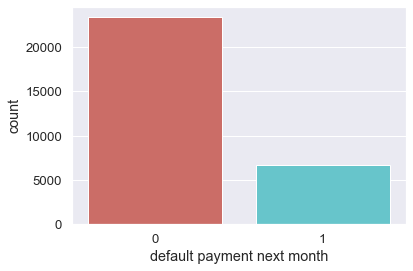

percentage of non default is 77.88000000000001
percentage of defauld is 22.12


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='default payment next month', data=df, palette='hls')
plt.show()

count_no_sub = len(df[df['default payment next month']==0])
count_sub = len(df[df['default payment next month']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of non default is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of defauld is", pct_of_sub*100)

### ML Alg witout FE

In [31]:
# ML Alg witout FE

label_col='default payment next month'
df_cpy=df 
res=ML_binary_clf(df_cpy,label_col)

,accuracy,precision,recall,auc_val,f_score
XGBoost,81.955556,66.279070,34.897959,0.649774,0.457219
Random_Forest,81.277778,62.008734,36.224490,0.650228,0.457327
SVM,81.733333,67.211329,31.479592,0.636020,0.428770
LogisticRegression,80.822222,68.111455,22.448980,0.597614,0.337682


Using the default of credit card clients dataset, the results of application of four different ML algorithms on binary classification based problems show that all four ML based algorithms have almost similar performance in terms of accuracy. However, the RF seems the best in terms of recall and Logistic Regression in terms of precision.

### ML Alg with Features Selection (10 Features)

In [32]:
## ML Alg with Features Selection (10 Features)
# with Features Selection
label_col='default payment next month' 
Y= df[label_col].copy()
    
    #now delete the original
X = df.drop(label_col,axis=1)
X, y=XYsplit(df, label_col)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
df_cpy=df    
label_col='default payment next month' 
lda_components=1
pca_components=10
tnse_components=3
number_iter=300
alpha=0.09
num_features=10
learning_rate=0.11
tree=500
    
    

LDA_df, PCA_df, TSNE_df, LASSO_df, RF_df, XGB_df, RFE_df=FE_MLalg_binaryclf(df_cpy, label_col, X, Y, trainX, testX, trainY, 
                                                                      testY, lda_components, pca_components, 
                                                                      tnse_components, number_iter, alpha, num_features, 
                                                                      learning_rate,tree,random=None)




Linear Discriminant Analysis
Original number of features: 23
Reduced number of features: 1
ML Classification Algorithms Results with LDA FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,81.511111,63.285458,35.969388,0.650799,0.458686
Random_Forest,71.677778,35.012723,35.102041,0.584814,0.350573
SVM,81.544444,63.778802,35.306122,0.648619,0.454516
LogisticRegression,80.900000,67.438495,23.775510,0.602897,0.351565


PCA Analysis
Original number of features: 23
Reduced number of features: 10
ML Classification Algorithms Results with PCA FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,81.544444,64.197531,34.489796,0.645673,0.448722
Random_Forest,80.688889,59.487179,35.510204,0.643886,0.444728
SVM,81.866667,66.237624,34.132653,0.646445,0.450505
LogisticRegression,80.788889,67.962675,22.295918,0.596849,0.335766


tSNE Analysis
Original number of features: 23
Reduced number of features: 3
ML Classification Algorithms Results with tSNE FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,79.822222,57.982262,26.683673,0.606501,0.365479
Random_Forest,77.966667,49.031171,29.693878,0.605501,0.369876
SVM,79.866667,61.280488,20.510204,0.584511,0.307339
LogisticRegression,78.222222,0.000000,0.000000,0.500000,0.000000


Lasso Analysis
Selected Features
0     LIMIT_BAL
1           SEX
2     EDUCATION
3      MARRIAGE
4           AGE
5         PAY_0
6         PAY_2
7         PAY_3
8         PAY_4
9         PAY_5
10    BILL_AMT1
dtype: object
ML Classification Algorithms Results with Lasso FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,81.977778,66.344294,35.000000,0.650284,0.458250
Random_Forest,80.711111,59.256198,36.581633,0.647894,0.452366
SVM,81.755556,66.425620,32.806122,0.640948,0.439208
LogisticRegression,80.944444,68.817204,22.857143,0.599868,0.343164


Random Forest FS Analysis
Selected Features
PAY_0        9.780214
AGE          6.612790
BILL_AMT1    5.992291
LIMIT_BAL    5.940480
BILL_AMT2    5.420082
BILL_AMT3    5.167654
PAY_AMT1     5.068900
BILL_AMT6    4.961940
BILL_AMT4    4.952818
BILL_AMT5    4.923184
dtype: float64
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,82.100000,67.751780,33.979592,0.647384,0.452599
Random_Forest,80.955556,61.141304,34.438776,0.641725,0.440601
SVM,81.966667,68.996618,31.224490,0.636591,0.429926
LogisticRegression,80.977778,68.289086,23.622449,0.602842,0.351024


Random Forest FS Analysis
Selected Features
PAY_0        40.389748
PAY_2        19.445076
PAY_3         3.913856
PAY_4         3.842141
PAY_6         2.536490
PAY_AMT3      2.087170
PAY_5         2.028392
LIMIT_BAL     2.019863
BILL_AMT1     1.938453
PAY_AMT2      1.926965
dtype: float32
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,82.155556,66.889313,35.765306,0.654182,0.466090
Random_Forest,80.344444,57.757920,36.275510,0.644446,0.445628
SVM,82.166667,67.050913,35.612245,0.653700,0.465178
LogisticRegression,80.600000,68.013468,20.612245,0.589567,0.316366


RFE FS Analysis
Selected Features
0        PAY_0
1        PAY_2
2        PAY_3
3    BILL_AMT1
4     PAY_AMT1
5     PAY_AMT2
6     PAY_AMT3
7     PAY_AMT4
8     PAY_AMT5
9     PAY_AMT6
dtype: object
ML Classification Algorithms Results with RFE FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,82.188889,68.497409,33.724490,0.647032,0.451966
Random_Forest,81.066667,61.678832,34.489796,0.642619,0.442408
SVM,82.055556,69.230769,31.683673,0.638816,0.434722
LogisticRegression,80.488889,68.545455,19.234694,0.583887,0.300398


Here we have used seven different feature selection and feature extraction methods to evaluate their performance in predicting the label of binary class based classification. All these methods aim to remove redundant and irrelevant features so that classification of new instances will be more accurate.

The methods are Linear Discriminant Analysis (LDA), Principal component analysis (PCA), t-distributed stochastic neighbor embedding (t-SNE), Lasso based L1 feature selection, Random Forest based Feature Selection (RF), XGBooset based Feature Selection and Recursive Feature Elimination (RFE). The selected features are used as features to predict the class label using four different Machine Learning algorithms, which are XGBoost, Random forest, SVM and Logistic Regression (LR).

The results show that with the application of reducing the features the performance falls a bit in comparison to the using original whole features set. However, there does not seem a significant reduction in the performance in terms of accuracy, precision, and recall. The fall in performance is less than 2% if we extract about 10 of the features and use them in the analysis.

The comparison across various features extraction and selection methods indicates that LDA and PCA outperform the rest of five features extractions/selection methods as it has the highest accuracy, precision, and recall. Lasso, Random Forest, RFE and XGBoost based methods have almost performance as the result of four ML based algorithms is almost similar across these three feature selection based methods. The t-SNE based feature selection methods seems the worst among the seven methods. 

Comparison across Machine Learning algorithms show that the Random Forest and SVM are the best and come up with almost same amount of accuracy and precision.


### ML Alg with Features Selection (15 Features)

In [35]:
## ML Alg with Features Selection (15 Features)
# with Features Selection
label_col='default payment next month' 
Y= df[label_col].copy()
    
    #now delete the original
X = df.drop(label_col,axis=1)
X, y=XYsplit(df, label_col)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
df_cpy=df    
label_col='default payment next month' 


lda_components=1
pca_components=15
tnse_components=3
number_iter=300
alpha=0.13
num_features=15
learning_rate=0.2
tree=500
    

    

LDA_df, PCA_df, TSNE_df, LASSO_df, RF_df, XGB_df, RFE_df=FE_MLalg_binaryclf(df_cpy, label_col, X, Y, trainX, testX, trainY, 
                                                                      testY, lda_components, pca_components, 
                                                                      tnse_components, number_iter, alpha, num_features, 
                                                                      learning_rate,tree,random=None)




Linear Discriminant Analysis
Original number of features: 23
Reduced number of features: 1
ML Classification Algorithms Results with LDA FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,81.511111,63.285458,35.969388,0.650799,0.458686
Random_Forest,71.666667,35.010163,35.153061,0.584927,0.350815
SVM,81.544444,63.778802,35.306122,0.648619,0.454516
LogisticRegression,80.900000,67.438495,23.775510,0.602897,0.351565


PCA Analysis
Original number of features: 23
Reduced number of features: 15
ML Classification Algorithms Results with PCA FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,81.411111,63.324048,34.795918,0.645926,0.449127
Random_Forest,81.088889,61.538462,35.102041,0.644970,0.447044
SVM,81.800000,66.841004,32.602041,0.640496,0.438272
LogisticRegression,80.811111,68.118196,22.346939,0.597175,0.336535


tSNE Analysis
Original number of features: 23
Reduced number of features: 3
ML Classification Algorithms Results with tSNE FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,79.855556,58.556461,25.663265,0.603032,0.356864
Random_Forest,78.200000,49.917763,30.969388,0.611594,0.382242
SVM,79.733333,62.639405,17.193878,0.571694,0.269816
LogisticRegression,78.222222,0.000000,0.000000,0.500000,0.000000


Lasso Analysis
Selected Features
0     LIMIT_BAL
1           SEX
2     EDUCATION
3      MARRIAGE
4           AGE
5         PAY_0
6         PAY_2
7         PAY_3
8         PAY_4
9         PAY_5
10        PAY_6
11    BILL_AMT1
12     PAY_AMT5
dtype: object
ML Classification Algorithms Results with Lasso FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,82.088889,66.827853,35.255102,0.651915,0.461590
Random_Forest,81.088889,61.101549,36.224490,0.649020,0.454837
SVM,81.700000,66.702241,31.887755,0.637280,0.431481
LogisticRegression,80.933333,68.885449,22.704082,0.599245,0.341520


Random Forest FS Analysis
Selected Features
PAY_0        9.490055
AGE          6.608469
BILL_AMT1    6.003876
LIMIT_BAL    5.968637
BILL_AMT2    5.448427
PAY_AMT1     5.136433
BILL_AMT3    5.087672
BILL_AMT6    5.006599
BILL_AMT5    4.963241
BILL_AMT4    4.946628
PAY_AMT2     4.792054
PAY_2        4.774453
PAY_AMT3     4.604046
PAY_AMT6     4.553079
PAY_AMT4     4.327158
dtype: float64
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,81.944444,67.179487,33.418367,0.644365,0.446337
Random_Forest,81.244444,62.078153,35.663265,0.647990,0.453014
SVM,81.966667,69.390104,30.765306,0.634934,0.426299
LogisticRegression,80.700000,67.897271,21.581633,0.593704,0.327526


Random Forest FS Analysis
Selected Features
PAY_0        36.845131
PAY_2        19.932110
PAY_3         3.998759
PAY_4         3.669531
PAY_6         2.756535
PAY_AMT3      2.313308
BILL_AMT1     2.235609
PAY_5         2.134971
LIMIT_BAL     2.051992
BILL_AMT2     1.975180
PAY_AMT2      1.971158
EDUCATION     1.963886
PAY_AMT1      1.945929
PAY_AMT6      1.779573
BILL_AMT3     1.777691
dtype: float32
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,81.933333,66.276803,34.693878,0.648896,0.455459
Random_Forest,81.300000,61.929371,36.683673,0.652026,0.460750
SVM,82.066667,67.510121,34.030612,0.647355,0.452510
LogisticRegression,80.644444,67.986799,21.020408,0.591324,0.321122


RFE FS Analysis
Selected Features
0     LIMIT_BAL
1     EDUCATION
2           AGE
3         PAY_0
4         PAY_2
5         PAY_3
6         PAY_4
7     BILL_AMT1
8     BILL_AMT3
9      PAY_AMT1
10     PAY_AMT2
11     PAY_AMT3
12     PAY_AMT4
13     PAY_AMT5
14     PAY_AMT6
dtype: object
ML Classification Algorithms Results with RFE FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,82.155556,67.878788,34.285714,0.648843,0.455593
Random_Forest,81.388889,62.489045,36.377551,0.651490,0.459852
SVM,81.933333,68.152174,31.989796,0.639139,0.435417
LogisticRegression,80.733333,67.993631,21.785714,0.594653,0.329985


Here we increase the number of extracted features from 10 to 15. The results show that there is no significant improvement in the performance. The results seem almost indicial to the one obtained in case of using the 10 features. The performance of LDA is best, followed by PCA. The RF, XGBoost, Lasso and RFE have almost same performance. t-SNE seems to be worst. Across the ML algorithms the SVM and RF outperform the others in terms of accuracy and precision.  

### ML Alg with Features Selection (5 Features)

In [36]:
## ML Alg with Features Selection (5 Features)
# with Features Selection
label_col='default payment next month' 
Y= df[label_col].copy()
    
    #now delete the original
X = df.drop(label_col,axis=1)
X, y=XYsplit(df, label_col)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
df_cpy=df    
label_col='default payment next month' 
lda_components=1
pca_components=5
tnse_components=3
number_iter=300
alpha=0.02
num_features=5
learning_rate=0.11
tree=500
    
    

LDA_df, PCA_df, TSNE_df, LASSO_df, RF_df, XGB_df, RFE_df=FE_MLalg_binaryclf(df_cpy, label_col, X, Y, trainX, testX, trainY, 
                                                                      testY, lda_components, pca_components, 
                                                                      tnse_components, number_iter, alpha, num_features, 
                                                                      learning_rate,tree,random=None)




Linear Discriminant Analysis
Original number of features: 23
Reduced number of features: 1
ML Classification Algorithms Results with LDA FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,81.511111,63.285458,35.969388,0.650799,0.458686
Random_Forest,71.688889,35.045778,35.153061,0.585069,0.350993
SVM,81.544444,63.778802,35.306122,0.648619,0.454516
LogisticRegression,80.900000,67.438495,23.775510,0.602897,0.351565


PCA Analysis
Original number of features: 23
Reduced number of features: 5
ML Classification Algorithms Results with PCA FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,80.155556,59.334764,28.214286,0.614154,0.382434
Random_Forest,78.433333,50.852018,28.928571,0.605722,0.368780
SVM,79.911111,61.875000,20.204082,0.583691,0.304615
LogisticRegression,79.433333,63.260341,13.265306,0.555602,0.219317


tSNE Analysis
Original number of features: 23
Reduced number of features: 3
ML Classification Algorithms Results with tSNE FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,79.655556,60.254372,19.336735,0.578928,0.292777
Random_Forest,78.255556,50.126582,30.306122,0.609556,0.377742
SVM,79.355556,61.333333,14.081633,0.558050,0.229046
LogisticRegression,78.222222,0.000000,0.000000,0.500000,0.000000


Lasso Analysis
Selected Features
0    LIMIT_BAL
1          SEX
2     MARRIAGE
3        PAY_0
4        PAY_2
5        PAY_3
dtype: object
ML Classification Algorithms Results with Lasso FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,81.766667,64.177778,36.836735,0.655562,0.468071
Random_Forest,79.700000,55.500414,34.234694,0.632963,0.423477
SVM,81.866667,66.532258,33.673469,0.644788,0.447154
LogisticRegression,80.833333,68.740032,21.989796,0.596029,0.333204


Random Forest FS Analysis
Selected Features
PAY_0        9.660216
AGE          6.625396
BILL_AMT1    6.004315
LIMIT_BAL    5.957170
BILL_AMT2    5.385281
dtype: float64
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,82.100000,67.934224,33.724490,0.646463,0.450733
Random_Forest,80.100000,57.000829,35.102041,0.638649,0.434481
SVM,81.977778,68.988764,31.326531,0.637030,0.430877
LogisticRegression,80.933333,67.941176,23.571429,0.602374,0.350000


Random Forest FS Analysis
Selected Features
PAY_0    40.389748
PAY_2    19.445076
PAY_3     3.913856
PAY_4     3.842141
PAY_6     2.536490
dtype: float32
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,82.100000,66.991237,35.102041,0.651433,0.460663
Random_Forest,81.644444,64.285714,35.357143,0.649442,0.456221
SVM,82.044444,66.829746,34.846939,0.650158,0.458082
LogisticRegression,80.811111,69.846678,20.918367,0.592021,0.321947


RFE FS Analysis
Selected Features
0        PAY_0
1        PAY_3
2    BILL_AMT1
3     PAY_AMT1
4     PAY_AMT2
dtype: object
ML Classification Algorithms Results with RFE FS


,accuracy,precision,recall,auc_val,f_score
XGBoost,81.933333,66.971545,33.622449,0.645030,0.447690
Random_Forest,79.855556,56.160939,34.183673,0.633773,0.424992
SVM,81.966667,68.784838,31.479592,0.637512,0.431922
LogisticRegression,80.544444,69.034608,19.336735,0.584610,0.302112


Here we decrease the number of extracted features from 10 to 5. The results show that there is significant loss in the performance. There seems to be about 10% loss in terms of accuracy and precision by reducing the number of extracted features.

The performance of RF, XGBoost, Lasso and RFE is best and have almost same precision and recall. The t-SNE seems to be worst. The LDA and PCA are on the second number. The Across the ML algorithms the SVM and XGBoost outperform the others in terms of accuracy and precision.  


## Dataset 3: MEU-Mobile KSD 2016 

In [37]:
FILE_NAME = "MEU-Mobile KSD 2016.csv"
LABEL_COL = "Subject"
df = load_data(FILE_NAME)
#df=pd.read_csv('C:\\Users\\waliullah\\Desktop\\MLii\\Assignment4\\pd_speech_features1.csv')
display(df.head())
print(df.shape)
print(df.dtypes)

,Subject,Hold .,Hold t,Hold i,Hold e,Hold Shift,Hold 5,Hold Shift.1,Hold Caps,Hold r,...,Size Caps,Size r,Size o,Size a,Size n,Size l,Size Enter,AvH,AvP,AvA
0,1,89,92,64,85,123,82,70,101,84,...,0.225806,0.225806,0.322581,0.290323,0.225806,0.354839,0.258065,88.071429,0.190971,0.288018
1,1,90,88,99,83,123,101,81,94,88,...,0.225806,0.225806,0.322581,0.322581,0.258065,0.387097,0.322581,92.071429,0.186514,0.274194
2,1,87,90,83,65,79,73,96,62,64,...,0.225806,0.193548,0.290323,0.322581,0.225806,0.258065,0.225806,83.571429,0.186171,0.271889
3,1,71,81,62,72,83,94,89,104,73,...,0.225806,0.225806,0.258065,0.290323,0.225806,0.322581,0.322581,81.428571,0.177943,0.278802
4,1,89,72,82,82,62,89,68,88,69,...,0.290323,0.225806,0.322581,0.258065,0.225806,0.290323,0.387097,77.428571,0.163200,0.283410


(2856, 72)
Subject         int64
Hold .          int64
Hold t          int64
Hold i          int64
Hold e          int64
               ...   
Size l        float64
Size Enter    float64
AvH           float64
AvP           float64
AvA           float64
Length: 72, dtype: object


In [38]:
df.isnull().sum()

Subject       0
Hold .        0
Hold t        0
Hold i        0
Hold e        0
             ..
Size l        0
Size Enter    0
AvH           0
AvP           0
AvA           0
Length: 72, dtype: int64

In [39]:
#Data X Transformation

label_col='Subject' 
df1=df
df=MinMax_Transformation(df1, label_col)

### ML Alg witout FE

In [40]:
# ML Alg witout FE

label_col='Subject'
df_cpy=df 
res=ML_multiclass_clf(df_cpy,label_col)

,accuracy,precision,recall,f_score
XGBoost,80.046674,80.046674,80.046674,0.799470
Random_Forest,92.532089,92.532089,92.532089,0.923526
SVM,65.810968,65.810968,65.810968,0.661108
LogisticRegression,63.360560,63.360560,63.360560,0.621503


The results of application of four different ML algorithms on binary classification based problems show that the Logistic Regression outperform the rest of algorithms in terms of overall accuracy. However, the Random Forest and SVM outperform the others in terms of precision and recall. Overall SVM seems to the best candidate model to predict the class label.

### ML Alg with Features Selection (10 Features)

In [43]:
## ML Alg with Features Selection (10 Features)
# with Features Selection
label_col='Subject' 
Y= df[label_col].copy()
    
    #now delete the original
X = df.drop(label_col,axis=1)
X, y=XYsplit(df, label_col)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
df_cpy=df    
label_col='Subject' 
lda_components=10
pca_components=10
tnse_components=2
number_iter=300
alpha=0.08
num_features=10
learning_rate=0.11
tree=500
    
    

LDA_df, PCA_df, TSNE_df, LASSO_df, RF_df, XGB_df, RFE_df=FE_MLalg_multiclf(df_cpy, label_col, X, Y, trainX, testX, trainY, 
                                                                      testY, lda_components, pca_components, 
                                                                      tnse_components, number_iter, alpha, num_features, 
                                                                      learning_rate,tree,random=None)



Linear Discriminant Analysis
Original number of features: 71
Reduced number of features: 10
ML Classification Algorithms Results with LDA FS


,accuracy,precision,recall,f_score
XGBoost,64.527421,64.527421,64.527421,0.648757
Random_Forest,69.194866,69.194866,69.194866,0.690707
SVM,72.695449,72.695449,72.695449,0.727117
LogisticRegression,71.878646,71.878646,71.878646,0.714027


PCA Analysis
Original number of features: 71
Reduced number of features: 10
ML Classification Algorithms Results with PCA FS


,accuracy,precision,recall,f_score
XGBoost,38.739790,38.739790,38.739790,0.383714
Random_Forest,40.956826,40.956826,40.956826,0.411112
SVM,44.807468,44.807468,44.807468,0.450687
LogisticRegression,34.189032,34.189032,34.189032,0.315241


tSNE Analysis
Original number of features: 71
Reduced number of features: 2
ML Classification Algorithms Results with tSNE FS


,accuracy,precision,recall,f_score
XGBoost,42.007001,42.007001,42.007001,0.407491
Random_Forest,39.789965,39.789965,39.789965,0.400129
SVM,37.922987,37.922987,37.922987,0.339422
LogisticRegression,34.072345,34.072345,34.072345,0.311169


Lasso Analysis
Selected Features
0             Hold n
1         DD l.Enter
2         UD l.Enter
3         Pressure i
4     Pressure Shift
5      Pressure Caps
6         Pressure a
7     Pressure Enter
8         Size Enter
9                AvH
10               AvP
11               AvA
dtype: object
ML Classification Algorithms Results with Lasso FS


,accuracy,precision,recall,f_score
XGBoost,55.075846,55.075846,55.075846,0.550616
Random_Forest,60.443407,60.443407,60.443407,0.602819
SVM,40.140023,40.140023,40.140023,0.395887
LogisticRegression,24.037340,24.037340,24.037340,0.214336


Random Forest FS Analysis
Selected Features
AvH          4.916028
AvA          4.177554
AvP          3.211048
DD Caps.r    2.292841
UD Caps.r    2.261405
DD n.l       2.124383
DD i.e       2.119492
UD o.a       2.082335
DD r.o       2.077077
DD a.n       2.066744
dtype: float64
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,f_score
XGBoost,70.945158,70.945158,70.945158,0.706772
Random_Forest,79.929988,79.929988,79.929988,0.794846
SVM,40.840140,40.840140,40.840140,0.395113
LogisticRegression,15.285881,15.285881,15.285881,0.107135


Random Forest FS Analysis
Selected Features
AvA           4.575877
AvP           3.722332
AvH           3.702333
Hold a        3.174852
UD o.a        2.982936
UD Caps.r     2.793411
UD l.Enter    2.596567
DD i.e        2.554679
DD a.n        2.436496
DD l.Enter    2.382475
dtype: float32
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,f_score
XGBoost,70.711785,70.711785,70.711785,0.707320
Random_Forest,77.129522,77.129522,77.129522,0.768139
SVM,44.574096,44.574096,44.574096,0.440592
LogisticRegression,20.303384,20.303384,20.303384,0.164201


RFE FS Analysis
Selected Features
0    Hold Shift
1        Hold r
2        Hold o
3        Hold a
4        Hold n
5        Size t
6     Size Caps
7           AvH
8           AvP
9           AvA
dtype: object
ML Classification Algorithms Results with RFE FS


,accuracy,precision,recall,f_score
XGBoost,48.424737,48.424737,48.424737,0.482316
Random_Forest,52.742124,52.742124,52.742124,0.518647
SVM,52.508751,52.508751,52.508751,0.523213
LogisticRegression,36.172695,36.172695,36.172695,0.323474


The results show that with the application of reducing the features the performance falls a bit in comparison to the using original whole features set. However, there does not seem a significant reduction in the performance in terms of accuracy, precision, and recall. The comparison across various features extraction and selection methods indicates that XGBoost is the best among other in terms of accuracy, precision, and recall. The Random Forest, Lasso and RFE have almost same performance.  Comparison across Machine Learning algorithms show that the Random Forest and SVM are the best and come up with almost same amount of accuracy and precision.

### ML Alg with Features Selection (15 Features)

In [46]:
## ML Alg with Features Selection (15 Features)
# with Features Selection
label_col='Subject' 
Y= df[label_col].copy()
    
    #now delete the original
X = df.drop(label_col,axis=1)
X, y=XYsplit(df, label_col)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
df_cpy=df    
label_col='Subject'

lda_components=15
pca_components=15
tnse_components=3
number_iter=300
alpha=0.09
num_features=15
learning_rate=0.2
tree=500
    
    

LDA_df, PCA_df, TSNE_df, LASSO_df, RF_df, XGB_df, RFE_df=FE_MLalg_multiclf(df_cpy, label_col, X, Y, trainX, testX, trainY, 
                                                                      testY, lda_components, pca_components, 
                                                                      tnse_components, number_iter, alpha, num_features, 
                                                                      learning_rate,tree,random=None)



Linear Discriminant Analysis
Original number of features: 71
Reduced number of features: 15
ML Classification Algorithms Results with LDA FS


,accuracy,precision,recall,f_score
XGBoost,66.394399,66.394399,66.394399,0.667496
Random_Forest,74.445741,74.445741,74.445741,0.740460
SVM,78.179697,78.179697,78.179697,0.783387
LogisticRegression,74.795799,74.795799,74.795799,0.746934


PCA Analysis
Original number of features: 71
Reduced number of features: 15
ML Classification Algorithms Results with PCA FS


,accuracy,precision,recall,f_score
XGBoost,41.306884,41.306884,41.306884,0.411303
Random_Forest,45.507585,45.507585,45.507585,0.452068
SVM,49.824971,49.824971,49.824971,0.501480
LogisticRegression,41.306884,41.306884,41.306884,0.396551


tSNE Analysis
Original number of features: 71
Reduced number of features: 3
ML Classification Algorithms Results with tSNE FS


,accuracy,precision,recall,f_score
XGBoost,40.723454,40.723454,40.723454,0.401170
Random_Forest,45.390898,45.390898,45.390898,0.448111
SVM,41.773629,41.773629,41.773629,0.396889
LogisticRegression,37.339557,37.339557,37.339557,0.348440


Lasso Analysis
Selected Features
0             Hold a
1             Hold n
2         DD l.Enter
3         UD l.Enter
4         Pressure t
5         Pressure i
6         Pressure e
7     Pressure Shift
8         Pressure 5
9      Pressure Caps
10        Pressure a
11        Pressure n
12    Pressure Enter
13        Size Enter
14               AvH
15               AvP
16               AvA
dtype: object
ML Classification Algorithms Results with Lasso FS


,accuracy,precision,recall,f_score
XGBoost,57.759627,57.759627,57.759627,0.577401
Random_Forest,68.611435,68.611435,68.611435,0.683938
SVM,42.940490,42.940490,42.940490,0.430936
LogisticRegression,29.171529,29.171529,29.171529,0.268206


Random Forest FS Analysis
Selected Features
AvH           4.957346
AvA           4.248136
AvP           3.157856
UD Caps.r     2.378671
DD Caps.r     2.212318
UD o.a        2.129665
UD i.e        2.111589
DD r.o        2.092234
UD r.o        2.081059
UD l.Enter    2.068374
UD n.l        2.057585
DD i.e        2.048154
DD o.a        2.030265
DD l.Enter    1.998818
DD n.l        1.984026
dtype: float64
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,f_score
XGBoost,71.295216,71.295216,71.295216,0.713631
Random_Forest,80.746791,80.746791,80.746791,0.805154
SVM,43.640607,43.640607,43.640607,0.428145
LogisticRegression,17.736289,17.736289,17.736289,0.130179


Random Forest FS Analysis
Selected Features
AvA           5.136408
AvP           3.866963
AvH           3.818790
Hold a        3.076774
DD i.e        3.059487
UD o.a        2.944897
Hold i        2.796641
UD l.Enter    2.637264
DD a.n        2.500731
DD l.Enter    2.393451
UD Caps.r     2.367267
UD 5.Shift    2.284286
UD ..t        2.272466
UD i.e        2.192970
DD r.o        2.115121
dtype: float32
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,f_score
XGBoost,74.562427,74.562427,74.562427,0.748526
Random_Forest,83.897316,83.897316,83.897316,0.838085
SVM,49.474912,49.474912,49.474912,0.496377
LogisticRegression,23.337223,23.337223,23.337223,0.193001


RFE FS Analysis
Selected Features
0         Hold Shift
1             Hold 5
2          Hold Caps
3             Hold r
4             Hold o
5             Hold a
6             Hold n
7     Pressure Enter
8             Size t
9             Size 5
10      Size Shift.1
11         Size Caps
12               AvH
13               AvP
14               AvA
dtype: object
ML Classification Algorithms Results with RFE FS


,accuracy,precision,recall,f_score
XGBoost,50.641774,50.641774,50.641774,0.507750
Random_Forest,56.359393,56.359393,56.359393,0.559250
SVM,54.842474,54.842474,54.842474,0.551712
LogisticRegression,42.123687,42.123687,42.123687,0.391796


Here we increase the number of extracted features from 10 to 15. The results show that there is significant improvement in the performance. The comparison across various features extraction and selection methods indicates that XGBoost is the best among other in terms of accuracy, precision, and recall. The Random Forest, Lasso and RFE have almost same performance. Comparison across Machine Learning algorithms show that the Random Forest and SVM are the best and come up with almost same amount of accuracy and precision.

### ML Alg with Features Selection (5 Features)

In [50]:
## ML Alg with Features Selection (5 Features)
# with Features Selection
label_col='Subject' 
Y= df[label_col].copy()
    
    #now delete the original
X = df.drop(label_col,axis=1)
X, y=XYsplit(df, label_col)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
df_cpy=df    
label_col='Subject' 
lda_components=5
pca_components=5
tnse_components=3
number_iter=300
alpha=0.075
num_features=5
learning_rate=0.2
tree=500
    
    

LDA_df, PCA_df, TSNE_df, LASSO_df, RF_df, XGB_df, RFE_df=FE_MLalg_multiclf(df_cpy, label_col, X, Y, trainX, testX, trainY, 
                                                                      testY, lda_components, pca_components, 
                                                                      tnse_components, number_iter, alpha, num_features, 
                                                                      learning_rate,tree,random=None)



Linear Discriminant Analysis
Original number of features: 71
Reduced number of features: 5
ML Classification Algorithms Results with LDA FS


,accuracy,precision,recall,f_score
XGBoost,53.792299,53.792299,53.792299,0.538903
Random_Forest,57.292882,57.292882,57.292882,0.573543
SVM,58.576429,58.576429,58.576429,0.590635
LogisticRegression,58.693116,58.693116,58.693116,0.584300


PCA Analysis
Original number of features: 71
Reduced number of features: 5
ML Classification Algorithms Results with PCA FS


,accuracy,precision,recall,f_score
XGBoost,36.522754,36.522754,36.522754,0.367239
Random_Forest,38.039673,38.039673,38.039673,0.385261
SVM,38.506418,38.506418,38.506418,0.383862
LogisticRegression,28.471412,28.471412,28.471412,0.254364


tSNE Analysis
Original number of features: 71
Reduced number of features: 3
ML Classification Algorithms Results with tSNE FS


,accuracy,precision,recall,f_score
XGBoost,41.190198,41.190198,41.190198,0.402263
Random_Forest,44.690782,44.690782,44.690782,0.432833
SVM,40.490082,40.490082,40.490082,0.373976
LogisticRegression,36.056009,36.056009,36.056009,0.333316


Lasso Analysis
Selected Features
0        Pressure i
1    Pressure Enter
2               AvH
3               AvP
4               AvA
dtype: object
ML Classification Algorithms Results with Lasso FS


,accuracy,precision,recall,f_score
XGBoost,44.457410,44.457410,44.457410,0.441165
Random_Forest,42.590432,42.590432,42.590432,0.419519
SVM,38.739790,38.739790,38.739790,0.380073
LogisticRegression,14.002334,14.002334,14.002334,0.100749


Random Forest FS Analysis
Selected Features
AvH          4.906460
AvA          4.207526
AvP          3.066363
DD Caps.r    2.391286
UD Caps.r    2.244847
dtype: float64
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,f_score
XGBoost,51.808635,51.808635,51.808635,0.515525
Random_Forest,51.808635,51.808635,51.808635,0.512267
SVM,36.756126,36.756126,36.756126,0.357797
LogisticRegression,12.252042,12.252042,12.252042,0.076307


Random Forest FS Analysis
Selected Features
AvA       5.136408
AvP       3.866963
AvH       3.818790
Hold a    3.076774
DD i.e    3.059487
dtype: float32
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,f_score
XGBoost,55.192532,55.192532,55.192532,0.544369
Random_Forest,57.642940,57.642940,57.642940,0.569610
SVM,43.757293,43.757293,43.757293,0.427112
LogisticRegression,16.569428,16.569428,16.569428,0.120883


RFE FS Analysis
Selected Features
0    Hold a
1    Hold n
2       AvH
3       AvP
4       AvA
dtype: object
ML Classification Algorithms Results with RFE FS


,accuracy,precision,recall,f_score
XGBoost,43.290548,43.290548,43.290548,0.427565
Random_Forest,42.590432,42.590432,42.590432,0.427569
SVM,45.040840,45.040840,45.040840,0.443440
LogisticRegression,20.536756,20.536756,20.536756,0.156517


Here we decrease the number of extracted features from 10 to 5. The results show that there is significant loss in the performance. There seems to be about 10% loss in terms of accuracy and precision by reducing the number of extracted features. The performance of RF, XGBoost, is best and have almost same precision and recall. The t-SNE seems to be worst. The Lasso and RFE seems to the second best and the LDA and PCA are on the third number. The Across the ML algorithms the SVM and XGBoost outperform the others in terms of accuracy and precision.

## Dataset 4: Mice Protein Expression (Data_Cortex_Nuclear)

In [51]:
FILE_NAME = "Data_Cortex_Nuclear.csv"
LABEL_COL = "class"
df = load_data(FILE_NAME)
#df=pd.read_csv('C:\\Users\\waliullah\\Desktop\\MLii\\Assignment4\\pd_speech_features1.csv')
display(df.head())
print(df.shape)
print(df.dtypes)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


(1080, 82)
MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object


In [52]:
df.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [53]:
df.drop('MouseID', inplace=True, axis=1)



df.isnull().sum()

DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
NR2A_N       3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 81, dtype: int64

In [54]:
cols_to_interpolate=['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
                     'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
                     'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
                     'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
                     'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
                     'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
                     'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
                     'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
                     'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
                     'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
                     'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
                     'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N']

df=fill_na_interpolate(df, cols_to_interpolate)



In [55]:

df = df.dropna()
df.reset_index(drop=True, inplace=True)

df.isnull().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 81, dtype: int64

In [56]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Genotype']=le.fit_transform(df['Genotype'])
df['Treatment']=le.fit_transform(df['Treatment'])
df['Behavior']=le.fit_transform(df['Behavior'])
df['class']=le.fit_transform(df['class'])

df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.743118,0.862653,0.377742,2.735757,6.067570,0.219049,0.185338,2.277492,0.194465,2.379508,...,0.125482,0.440142,0.129606,0.165288,0.163995,1.297220,0,0,0,0
1,0.711480,0.807054,0.351591,2.546888,5.595574,0.199170,0.165975,2.118811,0.174689,2.050484,...,0.125175,0.454352,0.117010,0.162857,0.158206,1.363189,0,0,0,0
2,0.704633,0.802537,0.350110,2.467733,5.548400,0.205323,0.165058,2.107281,0.171401,1.938913,...,0.124869,0.454509,0.111089,0.157731,0.158543,1.404481,0,0,0,0
3,0.677359,0.770235,0.356397,2.563223,4.975196,0.228087,0.186498,2.259045,0.190974,2.167848,...,0.124562,0.458548,0.156690,0.180153,0.195739,1.170038,0,0,0,0
4,0.591572,0.678768,0.312480,2.164182,4.313938,0.195786,0.161102,1.975689,0.161912,1.768720,...,0.124256,0.425027,0.126896,0.172995,0.169977,1.272986,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,1,1,1,7
1061,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,1,1,1,7
1062,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,1,1,1,7
1063,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,1,1,1,7


In [57]:
#Data X Transformation

label_col='class' 
df1=df
df=MinMax_Transformation(df1, label_col)
df['Genotype'] = df['Genotype'].astype(int)
df['Treatment'] = df['Treatment'].astype(int)
df['Behavior'] = df['Behavior'].astype(int)
df

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.252122,0.261865,0.687370,0.578919,0.641960,0.327466,0.479384,0.152530,0.422121,0.343133,...,0.234132,0.362335,0.124764,0.234173,0.199310,0.460530,0,0,0,0
1,0.238778,0.238279,0.618907,0.501093,0.571983,0.285687,0.402859,0.126602,0.319885,0.285250,...,0.232341,0.390700,0.093281,0.224648,0.180763,0.503275,0,0,0,0
2,0.235891,0.236363,0.615032,0.468476,0.564989,0.298618,0.399234,0.124718,0.302888,0.265622,...,0.230550,0.391013,0.078480,0.204557,0.181843,0.530031,0,0,0,0
3,0.224388,0.222660,0.631490,0.507824,0.480007,0.346460,0.483968,0.149516,0.404071,0.305897,...,0.228759,0.399075,0.192464,0.292432,0.301016,0.378121,0,0,0,0
4,0.188207,0.183858,0.516517,0.343393,0.381971,0.278575,0.383600,0.103216,0.253835,0.235681,...,0.226968,0.332163,0.117992,0.264379,0.218478,0.444827,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,0.046197,0.092577,0.365672,0.313684,0.127872,0.312096,0.423753,0.186230,0.488562,0.110645,...,0.572176,0.230480,0.597619,0.388482,0.725820,0.504334,1,1,1,7
1061,0.053509,0.097062,0.357235,0.342243,0.157739,0.395191,0.468154,0.190968,0.535204,0.114722,...,0.527466,0.232818,0.614760,0.371843,0.614028,0.504110,1,1,1,7
1062,0.035163,0.063556,0.311370,0.165795,0.071655,0.330863,0.384915,0.105509,0.374040,0.080099,...,0.425904,0.326363,0.603927,0.484631,0.811962,0.547100,1,1,1,7
1063,0.032018,0.071071,0.337173,0.224787,0.095856,0.306129,0.433086,0.121245,0.409605,0.086829,...,0.647984,0.277565,0.640497,0.571336,0.844450,0.529739,1,1,1,7


### ML Alg witout FE

In [58]:
# ML Alg witout FE

label_col='class'
df_cpy=df 
res=ML_multiclass_clf(df_cpy,label_col)

,accuracy,precision,recall,f_score
XGBoost,96.25,96.25,96.25,0.957755
Random_Forest,100.00,100.00,100.00,1.000000
SVM,100.00,100.00,100.00,1.000000
LogisticRegression,100.00,100.00,100.00,1.000000


The results of application of four different ML algorithms on binary classification based problems show that the Logistic Regression, Random Forest and SVM are 100% accurate in terms of all three accuracy criteria. The XGBoost seems a bit worse than the other three.

### ML Alg with Features Selection (10 Features)

In [65]:
## ML Alg with Features Selection (10 Features)
# with Features Selection
label_col='class' 
Y= df[label_col].copy()
    
    #now delete the original
X = df.drop(label_col,axis=1)
X, y=XYsplit(df, label_col)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
df_cpy=df    
label_col='class' 
lda_components=4
pca_components=10
tnse_components=2
number_iter=300
alpha=0.34
num_features=10
learning_rate=0.11
tree=500
    
    

LDA_df, PCA_df, TSNE_df, LASSO_df, RF_df, XGB_df, RFE_df=FE_MLalg_multiclf(df_cpy, label_col, X, Y, trainX, testX, trainY, 
                                                                      testY, lda_components, pca_components, 
                                                                      tnse_components, number_iter, alpha, num_features, 
                                                                      learning_rate,tree,random=None)


Linear Discriminant Analysis
Original number of features: 80
Reduced number of features: 4
ML Classification Algorithms Results with LDA FS


,accuracy,precision,recall,f_score
XGBoost,94.3750,94.3750,94.3750,0.947147
Random_Forest,95.9375,95.9375,95.9375,0.963728
SVM,96.5625,96.5625,96.5625,0.968279
LogisticRegression,96.2500,96.2500,96.2500,0.965575


PCA Analysis
Original number of features: 80
Reduced number of features: 10
ML Classification Algorithms Results with PCA FS


,accuracy,precision,recall,f_score
XGBoost,99.6875,99.6875,99.6875,0.996323
Random_Forest,100.0000,100.0000,100.0000,1.000000
SVM,100.0000,100.0000,100.0000,1.000000
LogisticRegression,100.0000,100.0000,100.0000,1.000000


tSNE Analysis
Original number of features: 80
Reduced number of features: 2
ML Classification Algorithms Results with tSNE FS


,accuracy,precision,recall,f_score
XGBoost,99.0625,99.0625,99.0625,0.989954
Random_Forest,100.0000,100.0000,100.0000,1.000000
SVM,100.0000,100.0000,100.0000,1.000000
LogisticRegression,100.0000,100.0000,100.0000,1.000000


Lasso Analysis
Selected Features
0       TRKA_N
1      pNUMB_N
2      pPKCG_N
3        ARC_N
4      GluR3_N
5        pS6_N
6       CaNA_N
7     Genotype
8    Treatment
9     Behavior
dtype: object
ML Classification Algorithms Results with Lasso FS


,accuracy,precision,recall,f_score
XGBoost,99.375,99.375,99.375,0.993168
Random_Forest,100.000,100.000,100.000,1.000000
SVM,100.000,100.000,100.000,1.000000
LogisticRegression,100.000,100.000,100.000,1.000000


Random Forest FS Analysis
Selected Features
Treatment      10.848080
Genotype       10.138145
SOD1_N          4.985803
Behavior        4.379229
pPKCG_N         3.336739
pERK_N          3.137252
CaNA_N          2.485933
DYRK1A_N        2.324298
Ubiquitin_N     2.204098
ITSN1_N         2.175839
dtype: float64
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,f_score
XGBoost,99.6875,99.6875,99.6875,0.996657
Random_Forest,100.0000,100.0000,100.0000,1.000000
SVM,100.0000,100.0000,100.0000,1.000000
LogisticRegression,100.0000,100.0000,100.0000,1.000000


Random Forest FS Analysis
Selected Features
BCL2_N      6.802333
SYP_N       6.678327
CaNA_N      5.958408
pMTOR_N     5.213238
BRAF_N      5.147465
SHH_N       4.613681
pPKCG_N     4.305129
pPKCAB_N    4.104352
Genotype    4.089956
P38_N       3.583378
dtype: float32
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,f_score
XGBoost,92.8125,92.8125,92.8125,0.927607
Random_Forest,97.5000,97.5000,97.5000,0.974229
SVM,89.6875,89.6875,89.6875,0.898465
LogisticRegression,70.0000,70.0000,70.0000,0.687640


RFE FS Analysis
Selected Features
0         SOD1_N
1        pPKCG_N
2           S6_N
3          ARC_N
4    Ubiquitin_N
5          pS6_N
6         CaNA_N
7       Genotype
8      Treatment
9       Behavior
dtype: object
ML Classification Algorithms Results with RFE FS


,accuracy,precision,recall,f_score
XGBoost,99.375,99.375,99.375,0.991859
Random_Forest,100.000,100.000,100.000,1.000000
SVM,100.000,100.000,100.000,1.000000
LogisticRegression,100.000,100.000,100.000,1.000000


Here I have used seven different feature selection and feature extraction methods to evaluate their performance in predicting the label of binary class based classification. All these methods aim to remove redundant and irrelevant features so that classification of new instances will be more accurate. The methods are Linear Discriminant Analysis (LDA), Principal component analysis (PCA), t-distributed stochastic neighbor embedding (t-SNE), Lasso based L1 feature selection, Random Forest based Feature Selection (RF), XGBooset based Feature Selection and Recursive Feature Elimination (RFE). The selected features are used as features to predict the class label using four different Machine Learning algorithms, which are XGBoost, Random forest, SVM and Logistic Regression (LR).

The results show that with the application of reducing the features the performance falls a bit in comparison to the using original whole features set. However, there does not seem a significant reduction in the performance in terms of accuracy, precision, and recall. The comparison across various features extraction and selection methods indicates that PCA, Lasso, Random Forest, XGBoost and RFE have 100% accuracy, precision, and recall. The LDA and t-NSE seems a bit worse than the other five features’ extractions methods.

The Logistic Regression, Random Forest and SVM are 100% accurate in terms of all three accuracy criterias. The XGBoost seems a bit worse than the other three.


### ML Alg with Features Selection (15 Features)

In [75]:
## ML Alg with Features Selection (15 Features)
# with Features Selection
label_col='class' 
Y= df[label_col].copy()
    
#now delete the original
X = df.drop(label_col,axis=1)
X, y=XYsplit(df, label_col)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
df_cpy=df    
label_col='class' 
lda_components=6
pca_components=15
tnse_components=3
number_iter=300
alpha=2.9
num_features=15
learning_rate=0.2
tree=500
    
    
    

LDA_df, PCA_df, TSNE_df, LASSO_df, RF_df, XGB_df, RFE_df=FE_MLalg_multiclf(df_cpy, label_col, X, Y, trainX, testX, trainY, 
                                                                      testY, lda_components, pca_components, 
                                                                      tnse_components, number_iter, alpha, num_features, 
                                                                      learning_rate,tree,random=None)


Linear Discriminant Analysis
Original number of features: 80
Reduced number of features: 6
ML Classification Algorithms Results with LDA FS


,accuracy,precision,recall,f_score
XGBoost,95.6250,95.6250,95.6250,0.955941
Random_Forest,99.6875,99.6875,99.6875,0.997275
SVM,98.4375,98.4375,98.4375,0.985125
LogisticRegression,99.6875,99.6875,99.6875,0.997275


PCA Analysis
Original number of features: 80
Reduced number of features: 15
ML Classification Algorithms Results with PCA FS


,accuracy,precision,recall,f_score
XGBoost,99.375,99.375,99.375,0.993053
Random_Forest,100.000,100.000,100.000,1.000000
SVM,100.000,100.000,100.000,1.000000
LogisticRegression,100.000,100.000,100.000,1.000000


tSNE Analysis
Original number of features: 80
Reduced number of features: 3
ML Classification Algorithms Results with tSNE FS


,accuracy,precision,recall,f_score
XGBoost,98.75,98.75,98.75,0.987383
Random_Forest,100.00,100.00,100.00,1.000000
SVM,100.00,100.00,100.00,1.000000
LogisticRegression,100.00,100.00,100.00,1.000000


Lasso Analysis
Selected Features
0        pJNK_N
1        pRSK_N
2        TRKA_N
3        MTOR_N
4       pMTOR_N
5       pNUMB_N
6       pPKCG_N
7         ARC_N
8       GluR3_N
9         pS6_N
10       CaNA_N
11     Genotype
12    Treatment
13     Behavior
dtype: object
ML Classification Algorithms Results with Lasso FS


,accuracy,precision,recall,f_score
XGBoost,99.6875,99.6875,99.6875,0.996803
Random_Forest,100.0000,100.0000,100.0000,1.000000
SVM,100.0000,100.0000,100.0000,1.000000
LogisticRegression,100.0000,100.0000,100.0000,1.000000


Random Forest FS Analysis
Selected Features
Treatment      10.297912
Genotype       10.150235
SOD1_N          4.884909
Behavior        4.166230
pPKCG_N         3.298503
pERK_N          3.256558
CaNA_N          2.681118
Ubiquitin_N     2.394434
DYRK1A_N        2.181614
pS6_N           2.071384
ARC_N           2.071313
APP_N           1.992916
pCAMKII_N       1.960053
pP70S6_N        1.909159
Tau_N           1.847798
dtype: float64
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,f_score
XGBoost,99.0625,99.0625,99.0625,0.988911
Random_Forest,100.0000,100.0000,100.0000,1.000000
SVM,100.0000,100.0000,100.0000,1.000000
LogisticRegression,100.0000,100.0000,100.0000,1.000000


Random Forest FS Analysis
Selected Features
BCL2_N       7.402934
SYP_N        5.787881
pMTOR_N      4.930232
CaNA_N       4.924162
AMPKA_N      4.638332
BRAF_N       4.386397
Genotype     4.286679
pAKT_N       4.221324
SHH_N        4.167904
pPKCG_N      3.801099
pPKCAB_N     3.720124
pP70S6_N     3.638589
P38_N        3.526210
Treatment    2.999167
Behavior     2.669520
dtype: float32
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,f_score
XGBoost,98.125,98.125,98.125,0.979176
Random_Forest,100.000,100.000,100.000,1.000000
SVM,100.000,100.000,100.000,1.000000
LogisticRegression,100.000,100.000,100.000,1.000000


RFE FS Analysis
Selected Features
0       pCAMKII_N
1        pPKCAB_N
2          SOD1_N
3         pNUMB_N
4        pP70S6_N
5         pPKCG_N
6            S6_N
7        ADARB1_N
8           ARC_N
9     Ubiquitin_N
10          pS6_N
11         CaNA_N
12       Genotype
13      Treatment
14       Behavior
dtype: object
ML Classification Algorithms Results with RFE FS


,accuracy,precision,recall,f_score
XGBoost,97.8125,97.8125,97.8125,0.973755
Random_Forest,100.0000,100.0000,100.0000,1.000000
SVM,100.0000,100.0000,100.0000,1.000000
LogisticRegression,100.0000,100.0000,100.0000,1.000000


Here we increase the number of extracted features from 10 to 15. The results show that with the application of reducing the features the performance falls a bit in comparison to the using original whole features set. However, there does not seem a significant reduction in the performance in terms of accuracy, precision, and recall. The comparison across various features extraction and selection methods indicates that PCA, Lasso, Random Forest, XGBoost and RFE have 100% accuracy, precision, and recall. The LDA and t-NSE seems a bit worse than the other five features’ extractions methods.

The Logistic Regression, Random Forest and SVM are 100% accurate in terms of all three accuracy criterias. The XGBoost seems a bit worse than the other three.


### ML Alg with Features Selection (5 Features)

In [80]:
## ML Alg with Features Selection (5 Features)
# with Features Selection
label_col='class' 
Y= df[label_col].copy()
    
    #now delete the original
X = df.drop(label_col,axis=1)
X, y=XYsplit(df, label_col)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
df_cpy=df    
label_col='class' 
lda_components=3
pca_components=5
tnse_components=2
number_iter=300
alpha=0.06
num_features=5
learning_rate=0.2
tree=500
    
    

LDA_df, PCA_df, TSNE_df, LASSO_df, RF_df, XGB_df, RFE_df=FE_MLalg_multiclf(df_cpy, label_col, X, Y, trainX, testX, trainY, 
                                                                      testY, lda_components, pca_components, 
                                                                      tnse_components, number_iter, alpha, num_features, 
                                                                      learning_rate,tree,random=None)


Linear Discriminant Analysis
Original number of features: 80
Reduced number of features: 3
ML Classification Algorithms Results with LDA FS


,accuracy,precision,recall,f_score
XGBoost,90.3125,90.3125,90.3125,0.909834
Random_Forest,91.8750,91.8750,91.8750,0.924770
SVM,90.3125,90.3125,90.3125,0.909771
LogisticRegression,90.9375,90.9375,90.9375,0.915788


PCA Analysis
Original number of features: 80
Reduced number of features: 5
ML Classification Algorithms Results with PCA FS


,accuracy,precision,recall,f_score
XGBoost,100.0,100.0,100.0,1.0
Random_Forest,100.0,100.0,100.0,1.0
SVM,100.0,100.0,100.0,1.0
LogisticRegression,100.0,100.0,100.0,1.0


tSNE Analysis
Original number of features: 80
Reduced number of features: 2
ML Classification Algorithms Results with tSNE FS


,accuracy,precision,recall,f_score
XGBoost,99.0625,99.0625,99.0625,0.990391
Random_Forest,100.0000,100.0000,100.0000,1.000000
SVM,100.0000,100.0000,100.0000,1.000000
LogisticRegression,100.0000,100.0000,100.0000,1.000000


Lasso Analysis
Selected Features
0        ARC_N
1       CaNA_N
2     Genotype
3    Treatment
4     Behavior
dtype: object
ML Classification Algorithms Results with Lasso FS


,accuracy,precision,recall,f_score
XGBoost,99.6875,99.6875,99.6875,0.997113
Random_Forest,100.0000,100.0000,100.0000,1.000000
SVM,100.0000,100.0000,100.0000,1.000000
LogisticRegression,100.0000,100.0000,100.0000,1.000000


Random Forest FS Analysis
Selected Features
Treatment    10.573620
Genotype      9.953548
SOD1_N        4.869929
Behavior      4.029964
pERK_N        3.466682
dtype: float64
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,f_score
XGBoost,99.0625,99.0625,99.0625,0.991188
Random_Forest,100.0000,100.0000,100.0000,1.000000
SVM,100.0000,100.0000,100.0000,1.000000
LogisticRegression,100.0000,100.0000,100.0000,1.000000


Random Forest FS Analysis
Selected Features
BCL2_N     7.402934
SYP_N      5.787881
pMTOR_N    4.930232
CaNA_N     4.924162
AMPKA_N    4.638332
dtype: float32
ML Classification Algorithms Results with Random Forest FS


,accuracy,precision,recall,f_score
XGBoost,63.750,63.750,63.750,0.628457
Random_Forest,68.750,68.750,68.750,0.679964
SVM,55.625,55.625,55.625,0.534460
LogisticRegression,41.875,41.875,41.875,0.391129


RFE FS Analysis
Selected Features
0        pS6_N
1       CaNA_N
2     Genotype
3    Treatment
4     Behavior
dtype: object
ML Classification Algorithms Results with RFE FS


,accuracy,precision,recall,f_score
XGBoost,99.6875,99.6875,99.6875,0.997113
Random_Forest,100.0000,100.0000,100.0000,1.000000
SVM,100.0000,100.0000,100.0000,1.000000
LogisticRegression,100.0000,100.0000,100.0000,1.000000


Here we decrease the number of extracted features from 10 to 15. The results show that with the application of reducing the features the performance falls a bit in comparison to the using original whole features set. However, there does not seem a significant reduction in the performance in terms of accuracy, precision, and recall. The comparison across various features extraction and selection methods indicates that PCA, Lasso, Random Forest, XGBoost and RFE have 100% accuracy, precision, and recall. The LDA and t-NSE seems a bit worse than the other five features’ extractions methods.

The Logistic Regression, Random Forest and SVM are 100% accurate in terms of all three accuracy criteria. The XGBoost seems a bit worse than the other three.


## Summary of Classification based Problem

Seven different techniques to perform dimensionality reduction on high-dimensional data. All these methods aim to remove redundant and irrelevant features so that classification of new instances will be more accurate. The methods are Linear Discriminant Analysis (LDA), Principal component analysis (PCA), t-distributed stochastic neighbor embedding (t-SNE), Lasso based L1 feature selection, Random Forest based Feature Selection (RF), XGBooset based Feature Selection and Recursive Feature Elimination (RFE). The selected features are used as features to predict the class label using four different Machine Learning algorithms, which are XGBoost, Random forest, SVM and Logistic Regression (LR). 

The results show that with the application of reducing the features the performance falls a bit in comparison to the using original whole features set. However, there does not seem a significant reduction in the performance in terms of accuracy, precision, and recall. The fall in performance is less than 1% if we extract about 10 of the features and use them in the analysis.

The comparison across various features extraction and selection methods indicates that XGBoost and Random Forest features selections methods outperform the other five methods. The Lasso and recursive features elimination (RFE) methods seems the second best. However, the LDA and PCA based methods outperform the former seven methods if the features are highly correlated, whereas the former four methods outperform the LDA and PCA based methods if the degree of correlation is low among the features. The t-SNE seems the worst performing features extraction methods.

By increasing the feature number, the accuracy and precision improve, while the performance of ML algorithms fall by decreasing the number of features. Overall, it seems that if the features are highly correlated then there is no significant fall in the performance by decreasing the number of factors or features. It is about 2 to 3%. However, if the degree of correlation is low then there is significant reduction in accuracy and precision scores in case of reduction in the number of features or factors. Comparison across Machine Learning algorithms show that the Random Forest and SVM are the best and come up with almost same amount of accuracy and precision.


# Regression based Data Analysis

The train.csv dataset which contains 81 features extracted from 21263 superconductors along with the critical temperature is analyzed using two different types of ML algorithms, which are
1. Linear Regression Model
2. Voting Regression 

with and without feature extraction/selections. Six different types of features extraction/selections are considered, which are

1. Principal component analysis (PCA)
2. t-distributed stochastic neighbor embedding (t-SNE)
3. Lasso based L1 feature selection -
4. Random Forest based Feature Selection (RF)
5. XGBooset based Feature Selection
6. Recursive Feature Elimination (RFE)

The dataset is

Dataset 5: Superconductivty Data Set (train)

The dependent variable (label) is "critical_temp".



## Dataset 5: Superconductivty Data Set (train)

In [81]:
FILE_NAME = "train.csv"
LABEL_COL = "critical_temp"
df = load_data(FILE_NAME)
#df=pd.read_csv('C:\\Users\\waliullah\\Desktop\\MLii\\Assignment4\\pd_speech_features1.csv')
display(df.head())
print(df.shape)
print(df.dtypes)

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


(21263, 82)
number_of_elements         int64
mean_atomic_mass         float64
wtd_mean_atomic_mass     float64
gmean_atomic_mass        float64
wtd_gmean_atomic_mass    float64
                          ...   
range_Valence              int64
wtd_range_Valence        float64
std_Valence              float64
wtd_std_Valence          float64
critical_temp            float64
Length: 82, dtype: object


In [82]:
#Data X Transformation

label_col='critical_temp' 
df1=df
df=MinMax_Transformation(df1, label_col)

### ML Alg witout FE for Regression

In [83]:
label_col='critical_temp' 
df_cpy=df
res_clf=ML_reg(df_cpy,label_col)

,R-Squared,Adj-R Squared,MAE,MSE,RMSE
Linear_Regression,0.728144,0.724647,13.424387,315.542302,17.763510
Voting_Regression,0.885481,0.884008,8.432079,132.921198,11.529146


The results of application of two different ML algorithms on regression based problems dataset show that the Voting Regression outperform the simple Linear Regression (MLR) model in terms of all accuracy features. The R-Squared as well as RMSE of Voting Regression is significantly lower than the Linear Regression based model.

### ML Alg with Features Selection (10 Features)

In [84]:
label_col='critical_temp' 
Y= df[label_col].copy()
    
    #now delete the original
X = df.drop(label_col,axis=1)
X, y=XYsplit(df, label_col)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
df_cpy=df    
label_col='critical_temp' 
lda_components=1
pca_components=10
tnse_components=3
number_iter=300
alpha=0.1
num_features=10
learning_rate=0.11
tree=100
    
    

PCA_df, TSNE_df, RF_df, XGB_df, RFE_df=FE_MLalg_reg(df_cpy, label_col, X, Y, trainX, testX, trainY, 
                                                                      testY, lda_components, pca_components, 
                                                                      tnse_components, number_iter, alpha, num_features, 
                                                                      learning_rate,tree,random=None)

PCA Analysis
Original number of features: 81
Reduced number of features: 10
ML Regression Algorithms Results with PCA FS


,R-Squared,Adj-R Squared,MAE,MSE,RMSE
Linear_Regression,0.562418,0.561731,17.864704,507.899573,22.536627
Voting_Regression,0.861160,0.860942,9.129162,161.150507,12.694507


tSNE Analysis
Original number of features: 81
Reduced number of features: 3
ML Regression Algorithms Results with tSNE FS


,R-Squared,Adj-R Squared,MAE,MSE,RMSE
Linear_Regression,0.183261,0.182876,25.428252,947.985724,30.789377
Voting_Regression,0.820394,0.820310,11.311081,208.467788,14.438414


Random Forest FS Analysis
Selected Features
range_ThermalConductivity          54.017313
wtd_gmean_ThermalConductivity      12.375299
std_atomic_mass                     2.978458
wtd_gmean_Valence                   2.110215
gmean_ElectronAffinity              1.095040
wtd_entropy_ThermalConductivity     1.085876
wtd_std_ElectronAffinity            1.072624
mean_Density                        1.035698
wtd_mean_ThermalConductivity        1.004299
wtd_std_Valence                     0.969976
dtype: float64
ML Regression Algorithms Results with Random Forest FS


,R-Squared,Adj-R Squared,MAE,MSE,RMSE
Linear_Regression,0.632902,0.632326,16.143617,426.089041,20.641924
Voting_Regression,0.883109,0.882925,7.901371,135.674834,11.647954


Random Forest FS Analysis
Selected Features
range_ThermalConductivity        65.199738
wtd_gmean_ThermalConductivity     9.434132
range_atomic_radius               2.499496
std_atomic_mass                   1.860079
gmean_ElectronAffinity            1.329480
wtd_gmean_Valence                 1.308799
wtd_std_ElectronAffinity          1.205467
std_Density                       1.095559
entropy_ThermalConductivity       0.850869
wtd_mean_ThermalConductivity      0.718418
dtype: float32
ML Regression Algorithms Results with XGB FS


,R-Squared,Adj-R Squared,MAE,MSE,RMSE
Linear_Regression,0.609084,0.608470,16.448230,453.734879,21.301053
Voting_Regression,0.883078,0.882894,7.994346,135.711307,11.649520


RFE FS Analysis
Selected Features
0           mean_atomic_mass
1       wtd_mean_atomic_mass
2          gmean_atomic_mass
3      wtd_gmean_atomic_mass
4                  range_fie
5                    std_fie
6     wtd_mean_atomic_radius
7    wtd_gmean_atomic_radius
8     range_ElectronAffinity
9       std_ElectronAffinity
dtype: object
ML Regression Algorithms Results with RFE FS


,R-Squared,Adj-R Squared,MAE,MSE,RMSE
Linear_Regression,0.575665,0.574999,17.043138,492.523626,22.192873
Voting_Regression,0.859899,0.859679,9.142508,162.614691,12.752047


Here six different techniques to perform dimensionality reduction on high-dimensional data are used. All these methods aim to remove redundant and irrelevant features so that prediction of new instances will be more accurate. The methods are as discussed above. The selected features are then used as features to predict the dependent variable using two different Machine Learning algorithms, which are Simple Linear Regression and Voting Regression.

The results show that with the application of reducing the features the performance falls a bit in comparison to the using original whole features set. However, there does not seem a significant reduction in the performance in terms of R-Squared, MAE and RMSE. The fall in performance is less than 1% if we extract about 10 of the features and use them in the analysis.
The comparison across various features extraction and selection methods indicates that Random Forest and XGBoost based features selection methods outperform the rest of four features extractions/selection methods. PCA is on the second number in terms of performance. It shows that the features variation is almost captured by the 10 PCA based factors. More than 95% of the variation is captured by these factors. The Recursive Features Elimination (RFE) method is better than t-SNE and worse than the rest. 

The t-SNE based feature selection methods seems the worst among the seven methods. 
Comparison across Machine Learning algorithms show that the Voting Regression performance is significantly higher than the Simple Linear Regression in terms of all accuracy-based measures.


### ML Alg with Features Selection (15 Features)

In [85]:
label_col='critical_temp' 
Y= df[label_col].copy()
    
    #now delete the original
X = df.drop(label_col,axis=1)
X, y=XYsplit(df, label_col)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
df_cpy=df    
label_col='critical_temp' 
lda_components=1
pca_components=15
tnse_components=3
number_iter=300
alpha=0.1
num_features=15
learning_rate=0.11
tree=100
    
    

PCA_df, TSNE_df, RF_df, XGB_df, RFE_df=FE_MLalg_reg(df_cpy, label_col, X, Y, trainX, testX, trainY, 
                                                                      testY, lda_components, pca_components, 
                                                                      tnse_components, number_iter, alpha, num_features, 
                                                                      learning_rate,tree,random=None)

PCA Analysis
Original number of features: 81
Reduced number of features: 15
ML Regression Algorithms Results with PCA FS


,R-Squared,Adj-R Squared,MAE,MSE,RMSE
Linear_Regression,0.592454,0.591493,17.071546,473.037201,21.749418
Voting_Regression,0.865492,0.865174,8.948377,156.123414,12.494936


tSNE Analysis
Original number of features: 81
Reduced number of features: 3
ML Regression Algorithms Results with tSNE FS


,R-Squared,Adj-R Squared,MAE,MSE,RMSE
Linear_Regression,0.139690,0.139285,26.80537,998.558447,31.599975
Voting_Regression,0.821379,0.821295,11.37378,207.324562,14.398769


Random Forest FS Analysis
Selected Features
range_ThermalConductivity          54.086594
wtd_gmean_ThermalConductivity      12.335965
std_atomic_mass                     2.798113
wtd_gmean_Valence                   2.112463
wtd_entropy_ThermalConductivity     1.247609
gmean_ElectronAffinity              1.162652
wtd_mean_Valence                    1.161541
wtd_mean_ThermalConductivity        1.144356
wtd_std_ElectronAffinity            1.036688
mean_Density                        1.024929
wtd_range_Valence                   0.925496
wtd_std_Valence                     0.831315
wtd_std_ThermalConductivity         0.789226
wtd_range_atomic_mass               0.728244
wtd_std_atomic_mass                 0.725744
dtype: float64
ML Regression Algorithms Results with Random Forest FS


,R-Squared,Adj-R Squared,MAE,MSE,RMSE
Linear_Regression,0.642355,0.641512,15.912456,415.116588,20.374410
Voting_Regression,0.879530,0.879246,8.437743,139.828539,11.824912


Random Forest FS Analysis
Selected Features
range_ThermalConductivity          65.199738
wtd_gmean_ThermalConductivity       9.434132
range_atomic_radius                 2.499496
std_atomic_mass                     1.860079
gmean_ElectronAffinity              1.329480
wtd_gmean_Valence                   1.308799
wtd_std_ElectronAffinity            1.205467
std_Density                         1.095559
entropy_ThermalConductivity         0.850869
wtd_mean_ThermalConductivity        0.718418
gmean_Density                       0.658043
mean_Density                        0.605342
wtd_entropy_ThermalConductivity     0.593412
wtd_range_Valence                   0.484002
wtd_std_Valence                     0.483726
dtype: float32
ML Regression Algorithms Results with XGB FS


,R-Squared,Adj-R Squared,MAE,MSE,RMSE
Linear_Regression,0.641539,0.640694,15.846617,416.063579,20.397637
Voting_Regression,0.883834,0.883560,8.135824,134.833584,11.611786


RFE FS Analysis
Selected Features
0               mean_atomic_mass
1           wtd_mean_atomic_mass
2              gmean_atomic_mass
3          wtd_gmean_atomic_mass
4                       mean_fie
5                      gmean_fie
6                      range_fie
7                        std_fie
8         wtd_mean_atomic_radius
9        wtd_gmean_atomic_radius
10     wtd_mean_ElectronAffinity
11    wtd_gmean_ElectronAffinity
12        range_ElectronAffinity
13          std_ElectronAffinity
14      wtd_std_ElectronAffinity
dtype: object
ML Regression Algorithms Results with RFE FS


,R-Squared,Adj-R Squared,MAE,MSE,RMSE
Linear_Regression,0.619751,0.618855,16.181259,441.353160,21.008407
Voting_Regression,0.859787,0.859456,9.645784,162.744755,12.757145


Here we increase the number of extracted features from 10 to 15. The results show that there is no significant improvement in the performance. The results seem almost indicial to the one obtained in case of using the 10 features. The performance of Random Forest and XGBoost based methods is best, followed by PCA. The RFE have almost same performance. The t-SNE seems to be worst. Across the ML algorithms the Voting Regression outperform the others in terms of R-Squared and RMSE.  

### ML Alg with Features Selection (5 Features)

In [86]:
label_col='critical_temp' 
Y= df[label_col].copy()
    
    #now delete the original
X = df.drop(label_col,axis=1)
X, y=XYsplit(df, label_col)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.3, random_state=42)
df_cpy=df    
label_col='critical_temp' 
lda_components=1
pca_components=5
tnse_components=2
number_iter=300
alpha=0.081
num_features=5
learning_rate=0.11
tree=100
    
    

PCA_df, TSNE_df, RF_df, XGB_df, RFE_df=FE_MLalg_reg(df_cpy, label_col, X, Y, trainX, testX, trainY, 
                                                                      testY, lda_components, pca_components, 
                                                                      tnse_components, number_iter, alpha, num_features, 
                                                                      learning_rate,tree,random=None)

PCA Analysis
Original number of features: 81
Reduced number of features: 5
ML Regression Algorithms Results with PCA FS


,R-Squared,Adj-R Squared,MAE,MSE,RMSE
Linear_Regression,0.539144,0.538782,18.051610,534.913502,23.128197
Voting_Regression,0.853307,0.853192,9.175283,170.266058,13.048604


tSNE Analysis
Original number of features: 81
Reduced number of features: 2
ML Regression Algorithms Results with tSNE FS


,R-Squared,Adj-R Squared,MAE,MSE,RMSE
Linear_Regression,0.213889,0.213642,24.342085,912.435650,30.206550
Voting_Regression,0.825559,0.825504,10.329002,202.473082,14.229304


Random Forest FS Analysis
Selected Features
range_ThermalConductivity          54.023765
wtd_gmean_ThermalConductivity      12.427331
std_atomic_mass                     2.703324
wtd_gmean_Valence                   2.223437
wtd_entropy_ThermalConductivity     1.164621
dtype: float64
ML Regression Algorithms Results with Random Forest FS


,R-Squared,Adj-R Squared,MAE,MSE,RMSE
Linear_Regression,0.506603,0.506216,19.040107,572.684102,23.930819
Voting_Regression,0.869080,0.868977,8.746272,151.958721,12.327154


Random Forest FS Analysis
Selected Features
range_ThermalConductivity        65.199738
wtd_gmean_ThermalConductivity     9.434132
range_atomic_radius               2.499496
std_atomic_mass                   1.860079
gmean_ElectronAffinity            1.329480
dtype: float32
ML Regression Algorithms Results with XGB FS


,R-Squared,Adj-R Squared,MAE,MSE,RMSE
Linear_Regression,0.548013,0.547658,18.293333,524.619482,22.904573
Voting_Regression,0.858007,0.857896,8.782716,164.810201,12.837843


RFE FS Analysis
Selected Features
0       wtd_mean_atomic_mass
1          gmean_atomic_mass
2      wtd_gmean_atomic_mass
3     wtd_mean_atomic_radius
4    wtd_gmean_atomic_radius
dtype: object
ML Regression Algorithms Results with RFE FS


,R-Squared,Adj-R Squared,MAE,MSE,RMSE
Linear_Regression,0.436126,0.435684,19.451419,654.486144,25.582927
Voting_Regression,0.793599,0.793437,10.964460,239.568869,15.478012


Here we decrease the number of extracted features from 10 to 5. The results show that there is no significant loss in the performance. The results seem almost indicial to the one obtained in case of using the 10 features. There seems to be about 4% loss in terms of Adjusted R-Squared by reducing the number of extracted features. The performance of Random Forest and XGBoost is best, followed by PCA.

## Summary of Regression based Problem Analysis

Six different techniques to perform dimensionality reduction on high-dimensional data are used. The methods are as discussed above. The selected features are then used as features to predict the dependent variable using two different Machine Learning algorithms, which are Simple Linear Regression and Voting Regression.

The results show that with the application of reducing the features the performance falls a bit in comparison to the using original whole features set. However, there does not seem a significant reduction in the performance in terms of R-Squared, MAE and RMSE. The fall in performance is less than 1% if we extract about 10 of the features and use them in the analysis.
The comparison across various features extraction and selection methods indicates that Random Forest and XGBoost based features selection methods outperform the rest of four features extractions/selection methods. PCA is on the second number in terms of performance. It shows that the features variation is almost captured by the 10 PCA based factors. More than 95% of the variation is captured by these factors. The Recursive Features Elimination (RFE) method is better than t-SNE and worse than the rest. 

The t-SNE based feature selection methods seems the worst among the seven methods. 

Comparison across Machine Learning algorithms show that the Voting Regression performance is significantly higher than the Simple Linear Regression in terms of all accuracy-based measures.


## Overall Summary

Seven different techniques to perform dimensionality reduction on high-dimensional data. Many different feature selection and feature extraction methods have been used. All these methods aim to remove redundant and irrelevant features so that classification of new instances will be more accurate. 
The methods are 

1. Linear Discriminant Analysis (LDA)
2. Principal component analysis (PCA)
3. t-distributed stochastic neighbor embedding (t-SNE) 
4. Lasso based L1 feature selection - 
5. Random Forest based Feature Selection (RF)
6. XGBooset based Feature Selection 
7. Recursive Feature Elimination (RFE)

The selected features are used as features to predict the class label using four different Machine Learning algorithms, which are

1. XGBoost, 
2. Random forest
3. SVM 
4. Logistic Regression (LR)

while used in regression based scenario with

1. Simple Linear Regression
2. Voting Regression

The results show that with the application of reducing the features the performance falls a bit in comparison to the using original whole features set. However, there does not seem a significant reduction in the performance in terms of accuracy, precision, and recall. The fall in performance is less than 1% if we extract about 10 of the features and use them in the analysis.

How does the classification performance compare across the 7 DR/FS methods?

The comparison across various features extraction and selection methods indicates that XGBoost and Random Forest features selections methods outperform the other five methods. The Lasso and recursive features elimination (RFE) methods seems the second best. However, the LDA and PCA based methods outperform the former seven methods if the features are highly correlated, whereas the former four methods outperform the LDA and PCA based methods if the degree of correlation is low among the features. The t-SNE seems the worst performing features extraction methods.

Comparison across Machine Learning algorithms show that the Random Forest and SVM are the best and come up with almost same amount of accuracy and precision.

How does the regression performance compare across the 7 DR/FS methods? 

The results show that with the application of reducing the features the performance falls a bit in comparison to the using original whole features set. However, there does not seem a significant reduction in the performance in terms of R-Squared, MAE and RMSE. The fall in performance is less than 1% if we extract about 10 of the features and use them in the analysis.
The comparison across various features extraction and selection methods indicates that Random Forest and XGBoost based features selection methods outperform the rest of four features extractions/selection methods. PCA is on the second number in terms of performance. It shows that the features variation is almost captured by the 10 PCA based factors. More than 95% of the variation is captured by these factors. The Recursive Features Elimination (RFE) method is better than t-SNE and worse than the rest. 

Comparison across Machine Learning algorithms show that the Voting Regression performance is significantly higher than the Simple Linear Regression in terms of all accuracy-based measures.

What is the effect of increasing or decreasing the total number of your desired features on the classification and regression performance?

By increasing the feature number, the accuracy and precision improve, while the performance of ML algorithms fall by decreasing the number of features. Overall, it seems that if the features are highly correlated then there is no significant fall in the performance by decreasing the number of factors or features. It is about 2 to 3%. However, if the degree of correlation is low then there is significant reduction in accuracy and precision scores in case of reduction in the number of features or factors.
